In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install nltk
%pip install wordcloud
%pip install scipy
%pip install statsmodels
%pip install networkx
%pip install rake_nltk
%pip install ace_tools
%pip install ipykernel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from scipy.stats import shapiro, pearsonr, spearmanr, ttest_ind, mannwhitneyu
from statsmodels.formula.api import logit

## Tratamento de dados

### Carregar dados

In [ ]:
df = pd.read_csv("./dados/Code Wise AI - prompts.csv")
df_testes = pd.read_csv("./dados/Code Wise AI - Testes.csv")
df_requisitos = pd.read_csv("./dados/Code Wise AI - Levantamento de Requisitos.csv")

df.head()

In [ ]:
df_testes.head()

In [ ]:
df_requisitos.head()

### Limpeza dos prompts e respostas

In [6]:
# # Renomear colunas para facilitar o merge e padronizar os datasets
# df_testes.rename(columns={'Nome de usuário': 'Email', 'Matrícula': 'Matricula'}, inplace=True)
# df_requisitos.rename(columns={'Nome de usuário': 'Email', 'Matrícula': 'Matricula'}, inplace=True)

# # Fazer o merge com base no email e matrícula, preenchendo valores ausentes com placeholders
# df_merged = pd.merge(df_testes, df_requisitos, on=['Email', 'Matricula'], how='outer', suffixes=('_Testes', '_Requisitos'))

# # Preencher valores ausentes com "N/A" para indicar que o dado não está disponível no respectivo dataset
# df_merged.fillna("N/A", inplace=True)

In [7]:
# # Renomear coluna para facilitar o merge
# df.rename(columns={'enrollment': 'Matricula'}, inplace=True)

# # Fazer o merge dos dados combinados com os dados de prompts
# df = pd.merge(df, df_merged, on='Matricula', how='outer')

# # Preencher valores ausentes com "N/A" para indicar que o dado não está disponível no respectivo dataset
# df.fillna("N/A", inplace=True)

In [8]:
# # Função para remover '#' e '\n', além de limpar formatações de listas e negrito
# def clean_response(response_text):
#     # Remover cabeçalhos marcados com # (###, ####, etc.) e substituir nova linha '\n' por espaço
#     cleaned_text = response_text.replace('#', '').replace('\n', ' ').strip()

#     # Remover negritos '**' ou '__' e substituí-los por texto sem formatação
#     cleaned_text = re.sub(r'\*\*(.*?)\*\*', r'\1', cleaned_text)  # Para negrito com **
#     cleaned_text = re.sub(r'__(.*?)__', r'\1', cleaned_text)  # Para negrito com __

#     # Substituir listas marcadas por '- ' ou '* ' com apenas o texto simples
#     cleaned_text = re.sub(r'[-*]\s+', '', cleaned_text)

#     return cleaned_text

# # Função para extrair código e criar a lista no formato desejado
# def extract_code_with_metadata(response_text):
#     # Define a expressão regular para detectar blocos de código entre tripla crase
#     code_pattern = re.compile(r'```(.*?)(.*?)```', re.DOTALL)

#     # Lista para armazenar os códigos extraídos com metadados
#     code_metadata_list = []

#     # Extrai blocos de código entre as crases e sua linguagem de programação
#     matches = code_pattern.findall(response_text)

#     # Iterar sobre os blocos de código encontrados
#     for idx, (lang, code) in enumerate(matches):
#         lang = lang.strip().lower()  # Normalizar a linguagem de programação

#         # Se a linguagem não estiver especificada
#         if not lang:
#             # Fazer o split no primeiro '\n' e pegar a primeira palavra como linguagem
#             first_line = code.split('\n', 1)[0].strip()
#             lang = first_line.split()[0] if first_line else 'desconhecida'

#         code = code.split('\n', 1)[1] if '\n' in code else code

#         code_metadata_list.append({
#             'linguagem_de_programacao': lang,
#             'posicao': idx,  # Posição em que o código aparece
#             'codigo': code.strip()
#         })

#     def replace_code_with_reference(match):
#         nonlocal idx
#         # Obtém o índice atual de substituição
#         idx = matches.index(match.groups())
#         return f'[{idx}]'

#     # Remove os blocos de código do texto original e coloca uma referência
#     cleaned_response = code_pattern.sub(replace_code_with_reference, response_text)

#     # Aplica a função de limpeza ao texto que resta
#     cleaned_response = clean_response(cleaned_response)

#     return code_metadata_list, cleaned_response

# # Aplicar a função na coluna 'response' para criar a coluna 'código' e 'cleaned_response_with_reference'
# df['codigo'], df['cleaned_response_with_reference'] = zip(*df['response'].apply(extract_code_with_metadata))

# # Visualizar o resultado após a limpeza
# print(df[['cleaned_response_with_reference']].head())

In [9]:
# avaliacao_mapeamento = {
#     "1 - Muito ruim": 1,
#     "2 - Ruim": 2,
#     "3 - Regular": 3,
#     "4 - Bom": 4,
#     "5 - Ótimo": 5,
#     "N/A": -1
# }

# sim_nao_mapeamento = {
#     "Sim": 1,
#     "Não": 0,
#     "N/A": -1
# }

# resultado_melhor_mapeamento = {
#     "Sim": 1,
#     "Não": 0,
#     "Não utilizei outra estratégia": 2,
#     "N/A": -1
# }

# # Função para mapear os valores
# def mapear_valores(coluna, mapeamento):
#     return coluna.map(lambda x: mapeamento.get(x, -1))

# # Criando novas colunas e aplicando os mapeamentos
# df["usou_ia_para_testes"] = mapear_valores(df["Você utilizou a ferramenta de IA para a atividade de Testes?"], sim_nao_mapeamento)
# df["usou_ia_para_requisitos"] = mapear_valores(df["Você utilizou a ferramenta de IA para a atividade de Levantamento de Requisitos?"], sim_nao_mapeamento)
# df["impacto_ia_aprendizagem_testes"] = mapear_valores(df["Como você avalia o impacto da ferramenta de IA no seu progresso de aprendiza-\ngem?_Testes"], avaliacao_mapeamento)
# df["adequacao_ia_testes"] = mapear_valores(df["Como você avalia a adequação da ferramenta de IA para essa tarefa?_Testes"], avaliacao_mapeamento)
# df["conceitos_relacionados_testes"] = mapear_valores(df["Como você avalia a adequação da ferramenta de IA para aprender conceitos\nrelacionados a essa tarefa?_Testes"], avaliacao_mapeamento)
# df["esforco_adicional_testes"] = mapear_valores(df["Quanto esforço adicional foi necessário para adaptar o conteúdo gerado pela\nferramenta de IA para essa tarefa?_Testes"], avaliacao_mapeamento)
# df["nivel_satisfacao_testes"] = mapear_valores(df["De 1 a 5, qual o seu nível de satisfação com a ferramenta?_Testes"], avaliacao_mapeamento)
# df["utilizaria_novamente_testes"] = mapear_valores(df["Você utilizaria novamente o ChatGPT para este fim?_Testes"], sim_nao_mapeamento)
# df["maior_dificuldade_testes"] = df["Qual foi sua maior dificuldade para Testes?"]
# df["mais_positivo_experiencia_testes"] = df["O que você achou mais positivo na sua experiência com a ferramenta para Testes?"]
# df["opiniao_padroes_prompts_testes"] = df["O que você achou dos padrões de prompt sugerido para o Testes?"]
# df["utilizou_outro_padrao_prompt_testes"] = mapear_valores(df["Você utilizou outra estratégia para a elaboração dos prompts?_Testes"], sim_nao_mapeamento)
# df["resultado_melhor_testes"] = mapear_valores(df["Se sim, os resultados foram melhores?_Testes"], resultado_melhor_mapeamento)
# df["relato_extra_testes"] = df["Fale mais sobre sua experiência_Testes"]

# df["impacto_ia_aprendizagem_requisitos"] = mapear_valores(df["Como você avalia o impacto da ferramenta de IA no seu progresso de aprendiza-\ngem?_Requisitos"], avaliacao_mapeamento)
# df["adequacao_ia_requisitos"] = mapear_valores(df["Como você avalia a adequação da ferramenta de IA para essa tarefa?_Requisitos"], avaliacao_mapeamento)
# df["conceitos_relacionados_requisitos"] = mapear_valores(df["Como você avalia a adequação da ferramenta de IA para aprender conceitos\nrelacionados a essa tarefa?_Requisitos"], avaliacao_mapeamento)
# df["esforco_adicional_requisitos"] = mapear_valores(df["Quanto esforço adicional foi necessário para adaptar o conteúdo gerado pela\nferramenta de IA para essa tarefa?_Requisitos"], avaliacao_mapeamento)
# df["nivel_satisfacao_requisitos"] = mapear_valores(df["De 1 a 5, qual o seu nível de satisfação com a ferramenta?_Requisitos"], avaliacao_mapeamento)
# df["utilizaria_novamente_requisitos"] = mapear_valores(df["Você utilizaria novamente o ChatGPT para este fim?_Requisitos"], sim_nao_mapeamento)
# df["maior_dificuldade_requisitos"] = df["Qual foi sua maior dificuldade para Levantamento de Requisitos?"]
# df["mais_positivo_experiencia_requisitos"] = df["O que você achou mais positivo na sua experiência com a ferramenta para Levantamento de Requisitos?"]
# df["opiniao_padroes_prompts_requisitos"] = df["O que você achou dos padrões de prompt sugerido para o Levantamento de Requisitos?"]
# df["utilizou_outro_padrao_prompt_requisitos"] = mapear_valores(df["Você utilizou outra estratégia para a elaboração dos prompts?_Requisitos"], sim_nao_mapeamento)
# df["resultado_melhor_requisitos"] = mapear_valores(df["Se sim, os resultados foram melhores?_Requisitos"], resultado_melhor_mapeamento)
# df["relato_extra_requisitos"] = df["Fale mais sobre sua experiência_Requisitos"]

In [10]:
# # Renomeando colunas conforme solicitado
# df.rename(columns={
#     'Nível de experiência_Testes': 'nivel_experiencia_testes',
#     'Se não utilizou, qual foi o motivo?_Testes': 'motivo_nao_uso_testes',
#     'Quantas horas você dedicou a essa tarefa utilizando a ferramenta de IA? (Estimativa)_Testes': 'estimativa_uso_testes',
#     'Nível de experiência_Requisitos': 'nivel_experiencia_requisitos',
#     'Se não utilizou, qual foi o motivo?_Requisitos': 'motivo_nao_uso_requisitos',
#     'Quantas horas você dedicou a essa tarefa utilizando a ferramenta de IA? (Estimativa)_Requisitos': 'estimativa_uso_requisitos'
# }, inplace=True)

In [11]:
# # Listar as colunas antigas que não são mais necessárias
# colunas_para_remover = [
#     "Você utilizou a ferramenta de IA para a atividade de Testes?",
#     "Você utilizou a ferramenta de IA para a atividade de Levantamento de Requisitos?",
#     "Como você avalia o impacto da ferramenta de IA no seu progresso de aprendiza-\ngem?_Testes",
#     "Como você avalia a adequação da ferramenta de IA para essa tarefa?_Testes",
#     "Como você avalia a adequação da ferramenta de IA para aprender conceitos\nrelacionados a essa tarefa?_Testes",
#     "Quanto esforço adicional foi necessário para adaptar o conteúdo gerado pela\nferramenta de IA para essa tarefa?_Testes",
#     "De 1 a 5, qual o seu nível de satisfação com a ferramenta?_Testes",
#     "Você utilizaria novamente o ChatGPT para este fim?_Testes",
#     "Qual foi sua maior dificuldade para Testes?",
#     "O que você achou mais positivo na sua experiência com a ferramenta para Testes?",
#     "O que você achou dos padrões de prompt sugerido para o Testes?",
#     "Você utilizou outra estratégia para a elaboração dos prompts?_Testes",
#     "Se sim, os resultados foram melhores?_Testes",
#     "Fale mais sobre sua experiência_Testes",
#     "Como você avalia o impacto da ferramenta de IA no seu progresso de aprendiza-\ngem?_Requisitos",
#     "Como você avalia a adequação da ferramenta de IA para essa tarefa?_Requisitos",
#     "Como você avalia a adequação da ferramenta de IA para aprender conceitos\nrelacionados a essa tarefa?_Requisitos",
#     "Quanto esforço adicional foi necessário para adaptar o conteúdo gerado pela\nferramenta de IA para essa tarefa?_Requisitos",
#     "De 1 a 5, qual o seu nível de satisfação com a ferramenta?_Requisitos",
#     "Você utilizaria novamente o ChatGPT para este fim?_Requisitos",
#     "Qual foi sua maior dificuldade para Levantamento de Requisitos?",
#     "O que você achou mais positivo na sua experiência com a ferramenta para Levantamento de Requisitos?",
#     "O que você achou dos padrões de prompt sugerido para o Levantamento de Requisitos?",
#     "Você utilizou outra estratégia para a elaboração dos prompts?_Requisitos",
#     "Se sim, os resultados foram melhores?_Requisitos",
#     "Fale mais sobre sua experiência_Requisitos", 
#     'Carimbo de data/hora_Testes', 'Email',
#     'Marque a opção abaixo para confirmar seu consentimento:  _Testes',
#     'Carimbo de data/hora_Requisitos',
#     'Marque a opção abaixo para confirmar seu consentimento:  _Requisitos'
# ]

# # Remover as colunas antigas
# df.drop(columns=colunas_para_remover, inplace=True)

In [12]:
# # Remover as linhas onde 'theme', 'liked_interaction' ou 'disliked_interaction' são 'N/A'
# df = df[
#     (df['theme'] != 'N/A') &
#     (df['liked_interaction'] != 'N/A') &
#     (df['disliked_interaction'] != 'N/A')
# ]

In [13]:
# df.columns

In [14]:
# df.head()

In [15]:
# df.iloc[0]['cleaned_response_with_reference']

In [16]:
# df.iloc[0]['response']

In [17]:
# df.iloc[0]['codigo']

## Visualização de dados

### Visualizar número de usuários por nível de experiência

In [18]:
# # Remover valores nulos na coluna 'prompt'
# df.dropna(subset=['prompt'], inplace=True)

# # Remover duplicados
# df.drop_duplicates(subset=['prompt'], inplace=True)

In [19]:
# df.to_csv('checkpoint.csv', index=False)

In [3]:
df = pd.read_csv('./dados/Code Wise AI - checkpoint.csv')

In [4]:
df['expertise_level'] = df['expertise_level'].apply(
    lambda x: 'ATUA NO MERCADO' if x in ['PROFISSIONAL', 'ESTAGIÁRIO'] else 'APENAS ESTUDANTE'
)

In [5]:
# Count distinct enrollment by expertise_level
enrollment_by_expertise = df.groupby('expertise_level')['Matricula'].nunique().reset_index()

# Renaming columns for clarity
enrollment_by_expertise.columns = ['Nivel de Expertise', 'Alunos']

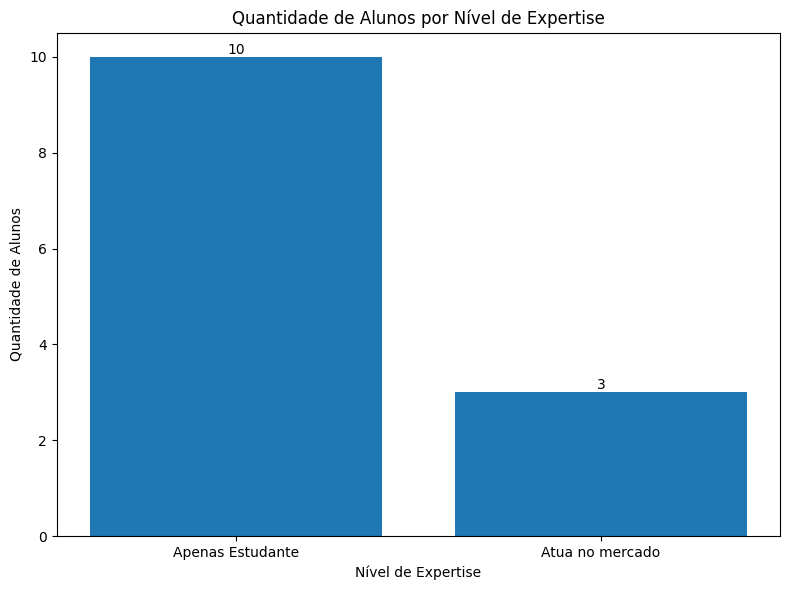

In [6]:
# Plotting the data
plt.figure(figsize=(8,6))
bars = plt.bar(enrollment_by_expertise['Nivel de Expertise'].replace({'APENAS ESTUDANTE': 'Apenas Estudante', 'ATUA NO MERCADO': 'Atua no mercado'}), enrollment_by_expertise['Alunos'])

# Adding labels and title
plt.xlabel('Nível de Expertise')
plt.ylabel('Quantidade de Alunos')
plt.title('Quantidade de Alunos por Nível de Expertise')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Display the plot
plt.tight_layout()
plt.show()

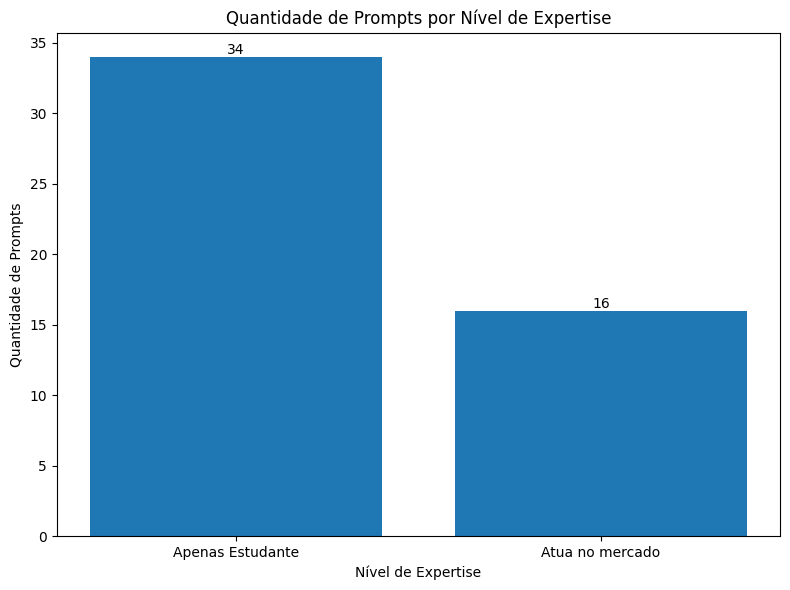

In [7]:
# Contar prompts distintos por expertise_level
prompts_by_expertise = df.groupby('expertise_level')['prompt'].nunique().reset_index()
prompts_by_expertise.columns = ['Nível de Expertise', 'Prompts']

# Plotting the data
plt.figure(figsize=(8,6))
bars = plt.bar(prompts_by_expertise['Nível de Expertise'].replace({'APENAS ESTUDANTE': 'Apenas Estudante', 'ATUA NO MERCADO': 'Atua no mercado'}), prompts_by_expertise['Prompts'])

# Adding labels and title
plt.xlabel('Nível de Expertise')
plt.ylabel('Quantidade de Prompts')
plt.title('Quantidade de Prompts por Nível de Expertise')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Display the plot
plt.tight_layout()
plt.show()

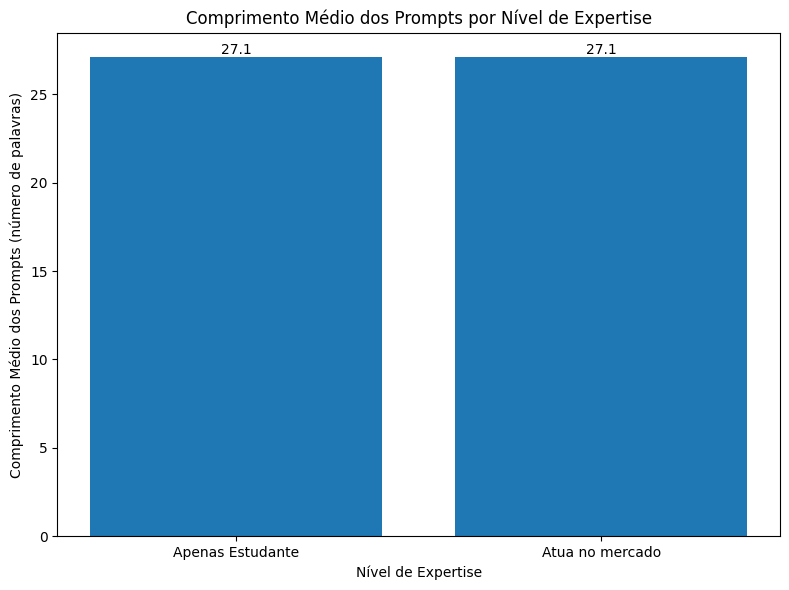

In [9]:
# Precisamos do comprimento dos prompts
df['prompt'] = df['prompt'].fillna('')  # Garantir que não tenha NaN
df['n_palavras'] = df['prompt'].apply(lambda x: len(x.split()))

# Agora, calcular a média do comprimento dos prompts por grupo
comprimento_by_expertise = df.groupby('expertise_level')['n_palavras'].mean().reset_index()
comprimento_by_expertise.columns = ['Nível de Expertise', 'Comprimento Médio']

# Plot conforme seu modelo
plt.figure(figsize=(8,6))
bars = plt.bar(
    comprimento_by_expertise['Nível de Expertise'].replace({'APENAS ESTUDANTE': 'Apenas Estudante', 'ATUA NO MERCADO': 'Atua no mercado'}),
    comprimento_by_expertise['Comprimento Médio']
)

# Labels e título
plt.xlabel('Nível de Expertise')
plt.ylabel('Comprimento Médio dos Prompts (número de palavras)')
plt.title('Comprimento Médio dos Prompts por Nível de Expertise')

# Inserindo valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', va='bottom', ha='center')

# Exibindo o plot
plt.tight_layout()
plt.show()

/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/2031118682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='expertise_level', y='n_palavras', data=df, palette='Set2')


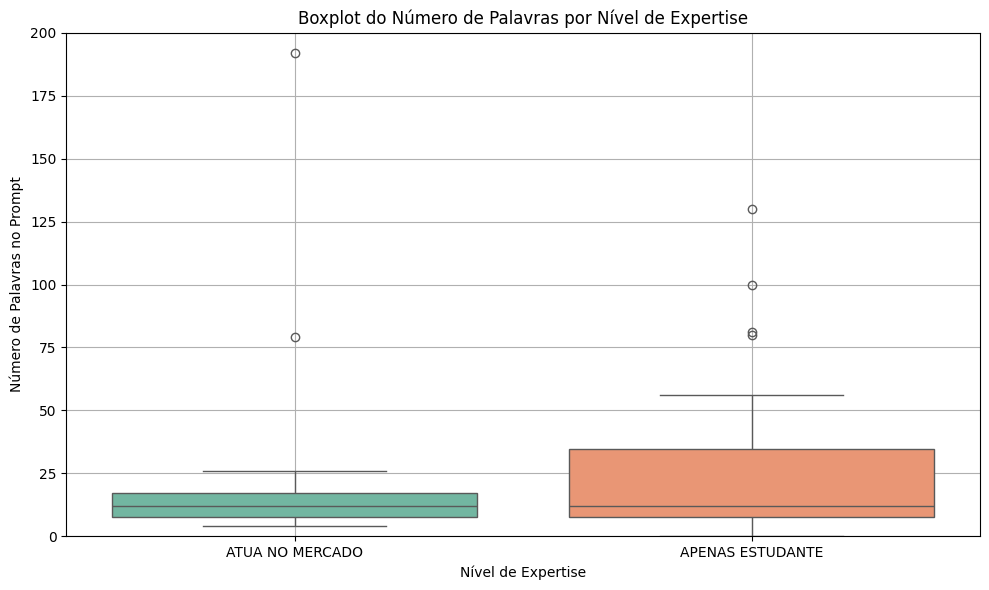

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='expertise_level', y='n_palavras', data=df, palette='Set2')
plt.title('Boxplot do Número de Palavras por Nível de Expertise')
plt.xlabel('Nível de Expertise')
plt.ylabel('Número de Palavras no Prompt')
plt.ylim(0, 200)  # Limitando a visualização para facilitar
plt.grid(True)
plt.tight_layout()
plt.show()

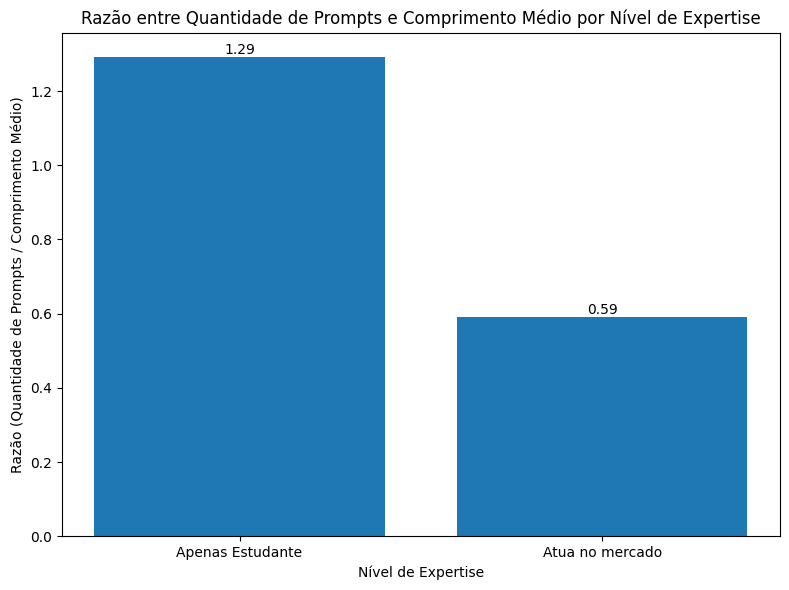

In [11]:
# Primeiro, contar a quantidade de prompts por grupo
prompts_by_expertise = df.groupby('expertise_level')['prompt'].nunique().reset_index()
prompts_by_expertise.columns = ['Nível de Expertise', 'Prompts']

# Agora, já temos o comprimento médio também
comprimento_by_expertise = df.groupby('expertise_level')['n_palavras'].mean().reset_index()
comprimento_by_expertise.columns = ['Nível de Expertise', 'Comprimento Médio']

# Unindo as duas tabelas
comparativo = prompts_by_expertise.merge(comprimento_by_expertise, on='Nível de Expertise')
comparativo['Razão (Prompts / Comprimento Médio)'] = comparativo['Prompts'] / comparativo['Comprimento Médio']

# Plotar essa razão
plt.figure(figsize=(8,6))
bars = plt.bar(
    comparativo['Nível de Expertise'].replace({'APENAS ESTUDANTE': 'Apenas Estudante', 'ATUA NO MERCADO': 'Atua no mercado'}),
    comparativo['Razão (Prompts / Comprimento Médio)']
)

# Labels e título
plt.xlabel('Nível de Expertise')
plt.ylabel('Razão (Quantidade de Prompts / Comprimento Médio)')
plt.title('Razão entre Quantidade de Prompts e Comprimento Médio por Nível de Expertise')

# Inserindo valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.tight_layout()
plt.show()

In [12]:
# Número de prompts
total_prompts = df.groupby('expertise_level')['prompt'].nunique().reset_index()
total_prompts.columns = ['Nível de Expertise', 'Prompts']

# Número de curtidas
curtidas_total = df[df['liked_interaction'] == 1].groupby('expertise_level')['prompt'].nunique().reset_index()
curtidas_total.columns = ['Nível de Expertise', 'Curtidas']

# Comprimento médio dos prompts em palavras
comprimento_medio = df.groupby('expertise_level')['n_palavras'].mean().reset_index()
comprimento_medio.columns = ['Nível de Expertise', 'Comprimento Médio']

# Média de prompt_tokens (quantidade de tokens do prompt)
prompt_tokens_medio = df.groupby('expertise_level')['prompt_tokens'].mean().reset_index()
prompt_tokens_medio.columns = ['Nível de Expertise', 'Média de Prompt Tokens']

# Unindo tudo
tabela_final = total_prompts.merge(curtidas_total, on='Nível de Expertise') \
                            .merge(comprimento_medio, on='Nível de Expertise') \
                            .merge(prompt_tokens_medio, on='Nível de Expertise')

# Calculando razões
tabela_final['Razão (Prompts / Comprimento Médio)'] = tabela_final['Prompts'] / tabela_final['Comprimento Médio']
tabela_final['Razão (Prompts / Curtidas)'] = tabela_final['Prompts'] / tabela_final['Curtidas']
tabela_final['Razão (Prompts / Tokens)'] = tabela_final['Prompts'] / tabela_final['Média de Prompt Tokens']

# Ajustando nomes
tabela_final['Nível de Expertise'] = tabela_final['Nível de Expertise'].replace({
    'APENAS ESTUDANTE': 'Apenas Estudante',
    'ATUA NO MERCADO': 'Atua no mercado'
})

# Formatando colunas
tabela_final['Comprimento Médio'] = tabela_final['Comprimento Médio'].apply(lambda x: f"{x:.2f} palavras")
tabela_final['Média de Prompt Tokens'] = tabela_final['Média de Prompt Tokens'].apply(lambda x: f"{x:.2f} tokens")

for col in ['Razão (Prompts / Comprimento Médio)', 'Razão (Prompts / Curtidas)', 'Razão (Prompts / Tokens)']:
    tabela_final[col] = tabela_final[col].apply(lambda x: f"{x:.2f}")

tabela_final

Nível de Expertise  Prompts  Curtidas Comprimento Médio  \
0   Apenas Estudante       35        14    27.09 palavras   
1    Atua no mercado       16        15    27.12 palavras   

  Média de Prompt Tokens Razão (Prompts / Comprimento Médio)  \
0           36.74 tokens                                1.29   
1           48.44 tokens                                0.59   

  Razão (Prompts / Curtidas) Razão (Prompts / Tokens)  
0                       2.50                     0.95  
1                       1.07                     0.33

### Visualizar número de prompts por tema

In [13]:
# Counting the number of prompts by theme
prompts_by_theme = df['theme'].value_counts().reset_index()

# Renaming columns for clarity
prompts_by_theme.columns = ['Tema', 'Quantidade']

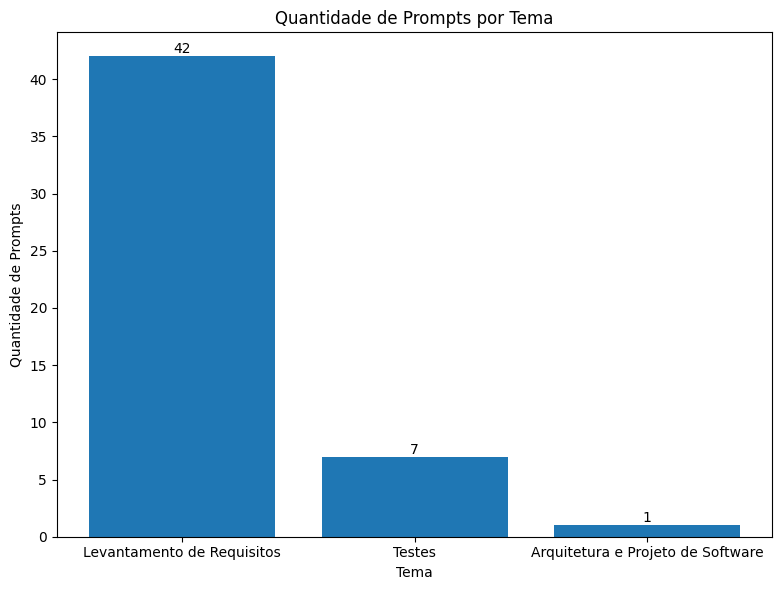

In [14]:
# Plotting the prompt count by theme
plt.figure(figsize=(8,6))
bars = plt.bar(prompts_by_theme['Tema'], prompts_by_theme['Quantidade'])

# Adding labels and title
plt.xlabel('Tema')
plt.ylabel('Quantidade de Prompts')
plt.title('Quantidade de Prompts por Tema')

# Adding the text on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Display the plot
plt.tight_layout()
plt.show()

### Visualizar quantidade de tokens por tema

In [15]:
# Summing the prompt tokens by theme

df['prompt_tokens'] = df['prompt_tokens'].astype(int)
df['response_tokens'] = df['response_tokens'].astype(int)

tokens_by_theme = df.groupby('theme').agg({
    'prompt_tokens': 'sum',
    'response_tokens': 'sum'
}).reset_index()

# Renaming columns for clarity
tokens_by_theme.columns = ['Tema', 'Total de Tokens dos Prompts', 'Total de Tokens das Respostas']

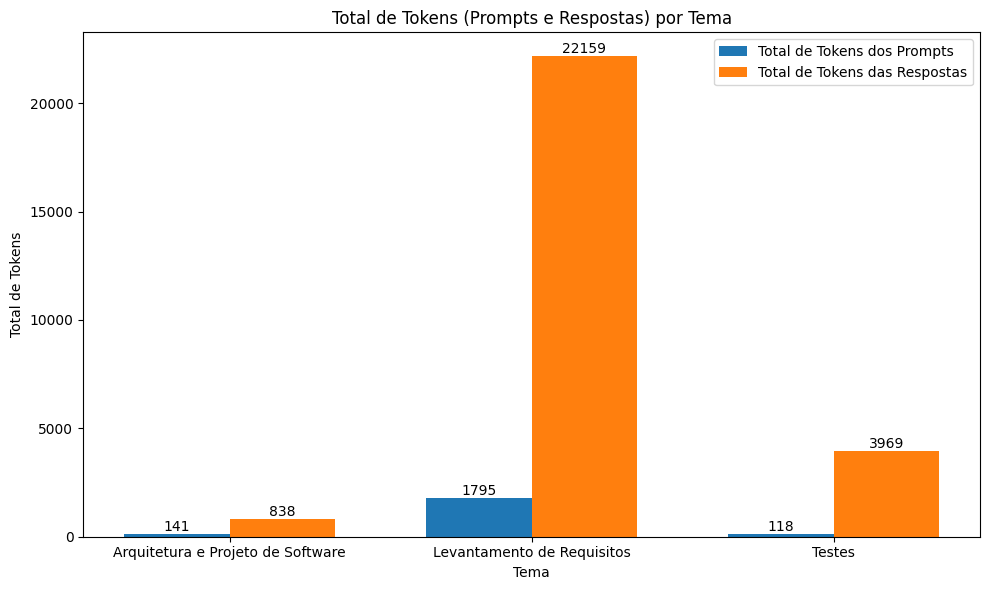

In [16]:
# Plotting the total prompt and response tokens by theme with values on top of the bars
plt.figure(figsize=(10,6))

# Plotting bars for both classes
bar_width = 0.35
index = range(len(tokens_by_theme))

bars1 = plt.bar(index, tokens_by_theme['Total de Tokens dos Prompts'], bar_width, label='Total de Tokens dos Prompts')
bars2 = plt.bar([i + bar_width for i in index], tokens_by_theme['Total de Tokens das Respostas'], bar_width, label='Total de Tokens das Respostas')

# Adding labels and title
plt.xlabel('Tema')
plt.ylabel('Total de Tokens')
plt.title('Total de Tokens (Prompts e Respostas) por Tema')

# Adding xticks to show theme labels correctly
plt.xticks([i + bar_width/2 for i in index], tokens_by_theme['Tema'])

# Adding legend
plt.legend()

# Adding the text on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Display the plot
plt.tight_layout()
plt.show()

### Quantidade de curtidas e descurtidas por total de interações

In [17]:
df_aux = df[['liked_interaction', 'disliked_interaction']].replace({
    True: 1,
    False: 0,
    'N/A': 0
})
df_aux

/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/765400522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aux = df[['liked_interaction', 'disliked_interaction']].replace({


liked_interaction  disliked_interaction
0                   1                     0
1                   1                     0
2                   1                     0
3                   1                     0
4                   1                     0
5                   1                     0
6                   1                     0
7                   1                     0
8                   1                     0
9                   1                     0
10                  1                     0
11                  0                     0
12                  1                     0
13                  0                     0
14                  0                     0
15                  0                     0
16                  0                     0
17                  0                     0
18                  0                     1
19                  1                     0
20                  1                     0
21                  1                     0
22                  1                     0
23                  1                     0
24                  1                     0
25                  1                     0
26                  1                     0
27                  0                     0
28                  0                     0
29                  0                     0
30                  0                     0
31                  0                     0
32                  0                     0
33                  1                     0
34                  0                     0
35                  0                     0
36                  0                     0
37                  0                     0
38                  0                     1
39                  0                     1
40                  1                     0
41                  0                     0
42                  1                     0
43                  1                     0
44                  1                     0
45                  0                     0
46                  0                     0
47                  1                     0
48                  1                     0
49                  1                     0
50                  1                     0

In [18]:
# First, calculate the total interactions (likes and dislikes) by summing up liked_interaction and disliked_interaction
total_interactions = df_aux.sum()

# Counting the total number of prompts
total_prompts = df.shape[0]

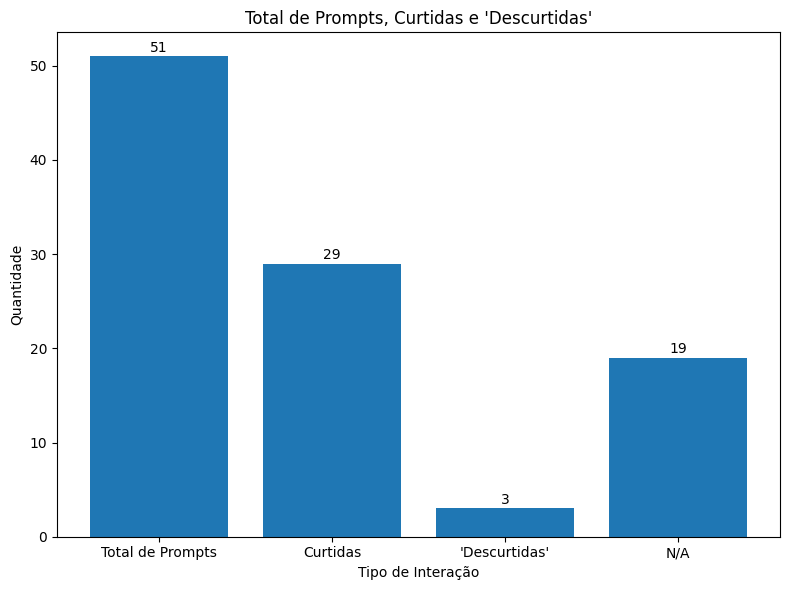

In [19]:
# Adding total prompts to the previous plot
plt.figure(figsize=(8,6))

# Plotting the total number of prompts, likes, and dislikes
categories = ['Total de Prompts', 'Curtidas', "'Descurtidas'", 'N/A']
counts = [total_prompts, total_interactions['liked_interaction'], total_interactions['disliked_interaction'], total_prompts - total_interactions['liked_interaction'] - total_interactions['disliked_interaction']]

plt.bar(categories, counts)

# Adding labels and title
plt.xlabel('Tipo de Interação')
plt.ylabel('Quantidade')
plt.title("Total de Prompts, Curtidas e 'Descurtidas'")

# Adding the total count values on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 0.5, str(int(v)), ha='center')

# Display the plot
plt.tight_layout()
plt.show()

### Matriz de Correlação

/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/3886016492.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_correlation['liked_interaction'] = df_correlation['liked_interaction'].replace({
/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/3886016492.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_correlation['expertise_level'] = df_correlation['expertise_level'].replace({


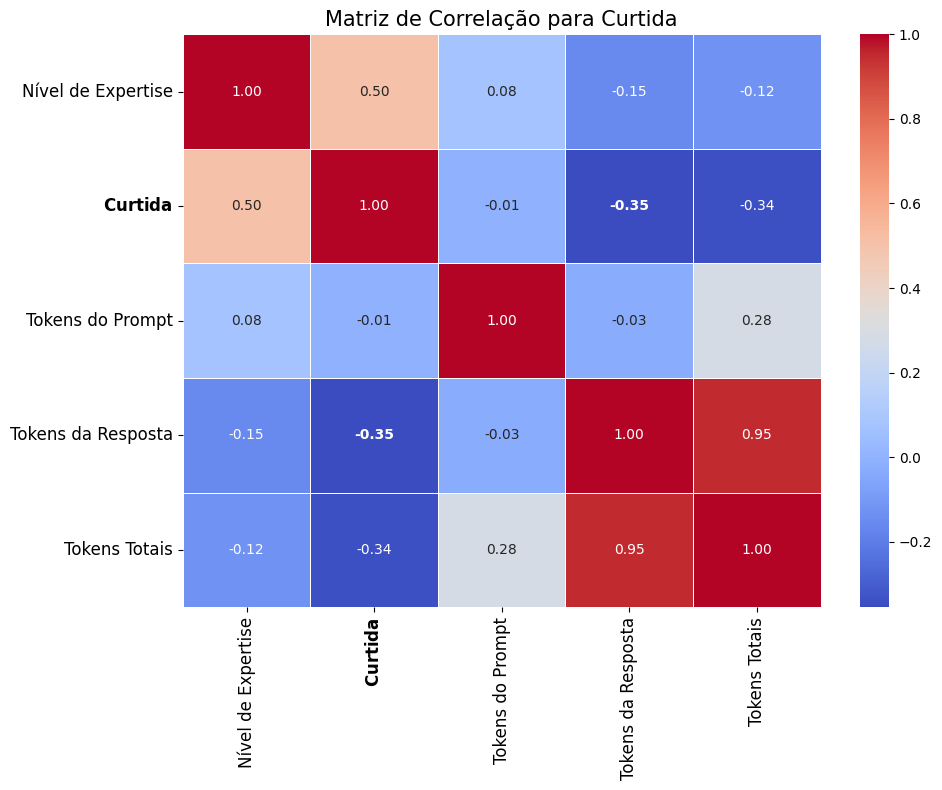

In [20]:
# Creating a new DataFrame with the columns used in the correlation matrix
columns_for_correlation = ['expertise_level', 'liked_interaction', 'prompt_tokens', 'response_tokens']

df_correlation = df[columns_for_correlation].copy()


# Discretizing categorical columns ('expertise_level', 'liked_interaction', 'disliked_interaction', and 'theme')
df_correlation['expertise_level'] = df_correlation['expertise_level'].replace({
    'APENAS_ESTUDANTE': 0,
    'ESTAGIÁRIO': 1,
    'PROFISSIONAL': 2,
    'N/A': -1
})
df_correlation['liked_interaction'] = df_correlation['liked_interaction'].replace({
    True: 1,
    False: 0,
    'N/A': 0
})

df_correlation['not_liked_interaction'] = len(df_correlation) - df_correlation['liked_interaction']


# Discretizing categorical columns ('expertise_level', 'liked_interaction', 'disliked_interaction', and 'theme')
df_correlation['expertise_level'] = df_correlation['expertise_level'].replace({
    'APENAS ESTUDANTE': 0,
    'ATUA NO MERCADO': 1,
})
df_correlation['liked_interaction'] = df_correlation['liked_interaction'].replace({
    True: 1,
    False: 0,
})

# 1 - Correlação com Liked
df_correlation_liked = df_correlation.copy()
df_correlation_liked.drop(columns=['not_liked_interaction'], inplace=True)

# Renomeando as colunas para exibição no gráfico
df_correlation_liked = df_correlation_liked.rename(columns={
    "expertise_level": "Nível de Expertise",
    "liked_interaction": "Curtida",
    "prompt_tokens": "Tokens do Prompt",
    "response_tokens": "Tokens da Resposta"
})

df_correlation_liked['Tokens Totais'] = df_correlation_liked['Tokens do Prompt'] + df_correlation_liked['Tokens da Resposta']

# Calculando a nova matriz de correlação
correlation_matrix_new_df = df_correlation_liked.corr()

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix_new_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajustando os rótulos do eixo para destacar "Curtida" em negrito
ax.set_xticklabels([r"$\bf{" + label + "}$" if label == "Curtida" else label for label in correlation_matrix_new_df.columns], fontsize=12)
ax.set_yticklabels([r"$\bf{" + label + "}$" if label == "Curtida" else label for label in correlation_matrix_new_df.index], fontsize=12)

# Destacando o valor na posição "Curtida" + "Tokens da Resposta" em negrito
for text in ax.texts:
    row, col = text.get_position()
    col_name = correlation_matrix_new_df.columns[int(col)]
    row_name = correlation_matrix_new_df.index[int(row)]
    
    if (col_name == "Tokens da Resposta" and row_name == "Curtida") or (col_name == "Curtida" and row_name == "Tokens da Resposta"):
        text.set_weight("bold")

# Adicionando título
plt.title("Matriz de Correlação para Curtida", size=15)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


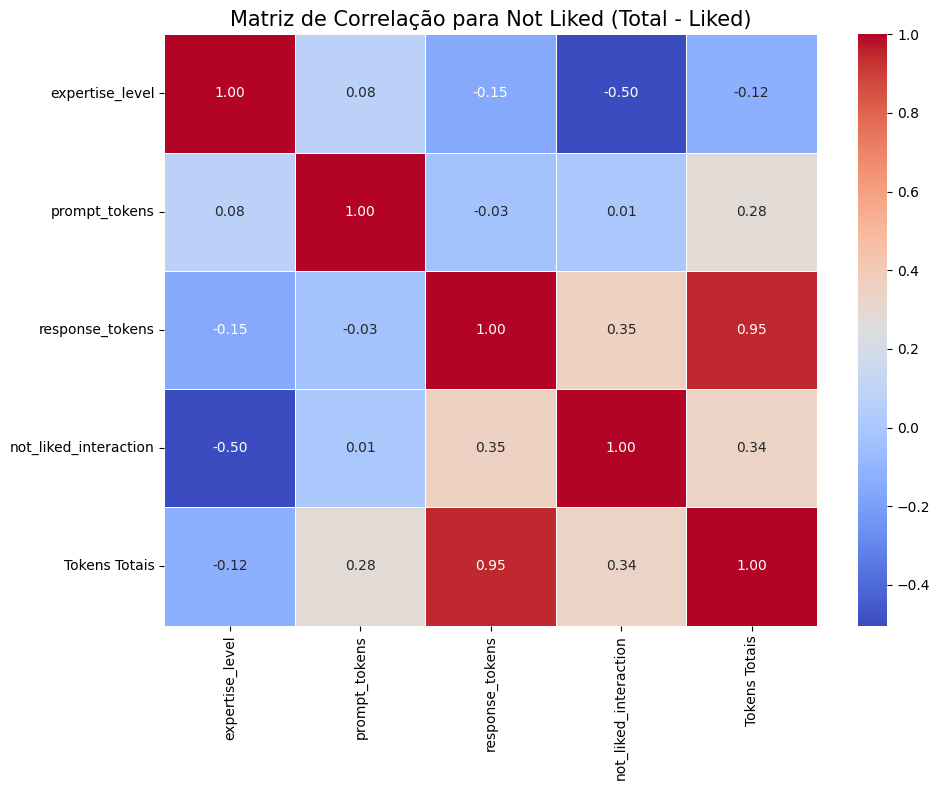

In [21]:
# 2 - Correlação com Not Liked
df_correlation_not_liked = df_correlation.copy()
df_correlation_not_liked.drop(columns=['liked_interaction'], inplace=True)

df_correlation_not_liked['Tokens Totais'] = df_correlation_not_liked['prompt_tokens'] + df_correlation_not_liked['response_tokens']

# Recalculating the correlation matrix for the new DataFrame
correlation_matrix_new_df = df_correlation_not_liked.corr()

# Plotting the updated correlation matrix for the new DataFrame
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_new_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adding title
plt.title('Matriz de Correlação para Not Liked (Total - Liked)', size=15)

# Display the plot
plt.tight_layout()
plt.show()

In [34]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Filtrar colunas relacionadas a "Testes" e "Requisitos"
# columns_testes = [col for col in df.columns if col.endswith('_testes') or col in ['expertise_level', 'prompt_tokens', 'response_tokens']]
# columns_requisitos = [col for col in df.columns if col.endswith('_requisitos') or col in ['expertise_level', 'prompt_tokens', 'response_tokens']]

# # Criar DataFrames filtrados para cada categoria
# df_testes_corr = df[columns_testes].copy()
# df_requisitos_corr = df[columns_requisitos].copy()

# # Substituir valores categóricos por números em 'expertise_level'
# expertise_mapping = {
#     'APENAS_ESTUDANTE': 0,
#     'ESTAGIÁRIO': 1,
#     'PROFISSIONAL': 2,
#     'N/A': -1
# }

# df_testes_corr.loc[:, 'expertise_level'] = df_testes_corr['expertise_level'].map(expertise_mapping)
# df_requisitos_corr.loc[:, 'expertise_level'] = df_requisitos_corr['expertise_level'].map(expertise_mapping)

# # Garantir que todas as colunas são numéricas antes da correlação
# df_testes_corr = df_testes_corr.apply(pd.to_numeric, errors='coerce')
# df_requisitos_corr = df_requisitos_corr.apply(pd.to_numeric, errors='coerce')

# # **Excluir colunas que não são numéricas**
# df_testes_corr = df_testes_corr.select_dtypes(include=['number'])
# df_requisitos_corr = df_requisitos_corr.select_dtypes(include=['number'])

# # **Remover colunas com valores NaN em todas as linhas** (evita colunas vazias no heatmap)
# df_testes_corr = df_testes_corr.dropna(axis=1, how='all')
# df_requisitos_corr = df_requisitos_corr.dropna(axis=1, how='all')

# # Calcular matrizes de correlação separadas
# correlation_matrix_testes = df_testes_corr.corr()
# correlation_matrix_requisitos = df_requisitos_corr.corr()

# # Criar heatmap para Testes
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix_testes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix - Testes', size=15)
# plt.tight_layout()
# plt.show()

# # Criar heatmap para Levantamento de Requisitos
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix_requisitos, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix - Levantamento de Requisitos', size=15)
# plt.tight_layout()
# plt.show()

## Testes estatísticos

<!-- <b>Shapiro-Wilk para Prompt Tokens:</b> estatística distante de 1 e p-valor < 0.05, rejeitando a hipótese de normalidade dos dados; <p>
<b>Shapiro-Wilk para Response Tokens:</b> estatística bem próxima de 1 e p-valor >= 0.05, indicando maior normalidade dos dados; <p>
<b>Correlação de Peason (Prompt Tokens x Response Tokens, melhor para dados em dist. normal):</b> p-value muito alto, indicando independência entre as variáveis; <p>
<b>Correlação de Spearman (Prompt Tokens x Response Tokens, dist. não normal):</b> p-value muito alto, indicando independência entre as variáveis; <p>
<b>T-Test para Prompt Tokens e Response Tokens:</b> há diferenças estatísticamente significativas de tokens entre os grupos que gostaram e os que não gostaram da interação. Valor negativo para Prompt Tokens e positivo para Response Tokens; <p>
<b>Mann-Whitney U Test para Prompt Tokens e Response Tokens:</b> mostra que response tokens é diferente entre os grupos de satisfação; <p>
<b>Regressão Logística para Liked Interactions:</b> p-value próximo de 1 em prompt tokens mostra que não é estatisticamente relevante para o usuário gostar da interação. P-value próximo de 0 para response tokens mostra que essa variável impacta na curtida da interação. O coeficiente positivo mostra que, quanto maior a quantidade de tokens das respostas, maior a probabilidade do usuário gostar da interação. <p>
<b>Regressão Logística para Disliked Interactions:</b> p-value próximo a 0 em ambos prompt e response tokens mostra que ambas impactam na probabilidade do usuário curtir ou não as interações. Coeficiente positivo no primeiro caso mostra que, quanto maior a quantidade de tokens das perguntas, maior é a probabilidade dos usuários não curtirem as interações. Já para o segundo, o coeficiente negativo mostra que, quanto maior a quantidade de tokens das respostas, menor é essa probabilidade. <p> -->

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from statsmodels.discrete.discrete_model import Logit

# Definir K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Dicionários para armazenar os resultados
results_liked = []
results_expertise = []

# Listas para armazenar R² de McFadden e p-valores dos modelos ajustados
r2_liked_models = []
p_values_liked_models = []

r2_expertise_models = []
p_values_expertise_models = []

# Função para calcular R² de McFadden
def mcfadden_r2(model):
    return 1 - (model.llf / model.llnull)

# Loop de validação cruzada
for train_index, test_index in kf.split(df_correlation):
    train_data, test_data = df_correlation.iloc[train_index], df_correlation.iloc[test_index]

    # Regressão logística para liked_interaction
    X_liked = train_data[['prompt_tokens', 'response_tokens', 'expertise_level']]
    y_liked = train_data['liked_interaction']
    X_liked = sm.add_constant(X_liked)  # Adicionar intercepto

    logit_liked = Logit(y_liked, X_liked).fit(disp=False)
    results_liked.append(logit_liked.params)
    r2_liked_models.append(mcfadden_r2(logit_liked))
    p_values_liked_models.append(logit_liked.pvalues.to_dict())  # Salvar como dicionário

    train_data['prompt_tokens_binary'] = (train_data['prompt_tokens'] > train_data['prompt_tokens'].median()).astype(int)

    # Regressão logística para expertise_level e prompt_tokens_binary
    X_expertise = train_data[['expertise_level']]
    y_expertise = train_data['prompt_tokens_binary']
    X_expertise = sm.add_constant(X_expertise)  # Adicionar intercepto

    logit_expertise = Logit(y_expertise, X_expertise).fit(disp=False)
    results_expertise.append(logit_expertise.params)
    r2_expertise_models.append(mcfadden_r2(logit_expertise))
    p_values_expertise_models.append(logit_expertise.pvalues.to_dict())  # Salvar como dicionário

# Converter resultados para DataFrames
df_results_liked = pd.DataFrame(results_liked)
df_results_expertise = pd.DataFrame(results_expertise)

# Calcular estatísticas descritivas (média, mínimo e máximo)
summary_liked = df_results_liked.describe().loc[['mean', 'min', 'max']]
summary_expertise = df_results_expertise.describe().loc[['mean', 'min', 'max']]

# Criar DataFrames para R² de McFadden e p-valores
df_r2_liked_models = pd.DataFrame({'R² McFadden': r2_liked_models})
df_r2_expertise_models = pd.DataFrame({'R² McFadden': r2_expertise_models})

df_p_values_liked_models = pd.DataFrame(p_values_liked_models)
df_p_values_expertise_models = pd.DataFrame(p_values_expertise_models)

# Calcular estatísticas descritivas (média, mínimo e máximo)
summary_r2_liked_models = df_r2_liked_models.describe().loc[['mean', 'min', 'max']]
summary_r2_expertise_models = df_r2_expertise_models.describe().loc[['mean', 'min', 'max']]

summary_p_values_liked_models = df_p_values_liked_models.describe().loc[['mean', 'min', 'max']]
summary_p_values_expertise_models = df_p_values_expertise_models.describe().loc[['mean', 'min', 'max']]

# Calcular Odds Ratio e variação percentual
odds_ratios_liked = np.exp(df_results_liked.mean() * 100)  # Odds para cada 100 tokens
odds_ratios_liked['const'] = np.exp(df_results_liked['const'].mean())  # Correção para const
odds_ratios_liked['expertise_level'] = np.exp(df_results_liked['expertise_level'].mean())  # Correção para expertise_level
odds_ratios_variation_liked = (odds_ratios_liked - 1) * 100

odds_ratios_expertise = np.exp(df_results_expertise.mean())
odds_ratios_variation_expertise = (odds_ratios_expertise - 1) * 100

# Criar DataFrame para os Odds Ratios
odds_ratios_df = pd.DataFrame({
    'Variável': ['Intercept', 'Prompt Tokens', 'Response Tokens', 'Expertise Level'],
    'Coeficiente': df_results_liked.mean().values,
    'Odds Ratio (100 Tokens)': odds_ratios_liked.values,
    'Variação Percentual': odds_ratios_variation_liked.values
})

odds_ratios_expertise_df = pd.DataFrame({
    'Variável': ['Intercept', 'Expertise Level'],
    'Coeficiente': df_results_expertise.mean().values,
    'Odds Ratio': odds_ratios_expertise.values,
    'Variação Percentual': odds_ratios_variation_expertise.values
})

# Adicionando R² McFadden às tabelas de resumo estatístico
summary_liked['R² McFadden'] = summary_r2_liked_models.values
summary_expertise['R² McFadden'] = summary_r2_expertise_models.values

# Adicionando p-valores médios às tabelas de resumo estatístico
p_values_liked_mean = df_p_values_liked_models.mean()
p_values_expertise_mean = df_p_values_expertise_models.mean()

# Renomeando colunas para indicar que são p-valores
p_values_liked_mean = p_values_liked_mean.rename(lambda x: f'P-valor {x}')
p_values_expertise_mean = p_values_expertise_mean.rename(lambda x: f'P-valor {x}')

# Adicionando os p-valores médios às tabelas
summary_liked = summary_liked.assign(**p_values_liked_mean)
summary_expertise = summary_expertise.assign(**p_values_expertise_mean)

# Aplica o teste de Mann-Whitney
print("Tokens prompts (curtidas x não curtidas)")
stat, p_valor = mannwhitneyu(df['liked_interaction'], df['disliked_interaction'], alternative='two-sided')

print(f'Estatística U = {stat}')
print(f'p-valor = {p_valor:.40f}')

# Interpretação
if p_valor < 0.05:
    print("Diferença significativa entre os grupos (rejeita H0)")
else:
    print("Não há diferença significativa entre os grupos (não rejeita H0)")

# Aplica o teste de Mann-Whitney
print("Tokens prompts (curtidas x não curtidas)")
stat, p_valor = mannwhitneyu(df[df['prompt_tokens'].notnull()]['liked_interaction'], df[df['response_tokens'].notnull()][ 'disliked_interaction'], alternative='two-sided')

print(f'Estatística U = {stat}')
print(f'p-valor = {p_valor:.40f}')

# Interpretação
if p_valor < 0.05:
    print("Diferença significativa entre os grupos (rejeita H0)")
else:
    print("Não há diferença significativa entre os grupos (não rejeita H0)")

# Aplica o teste de Mann-Whitney
print("Tokens respostas (curtidas x não curtidas)")
stat, p_valor = mannwhitneyu(df[df['response_tokens'].notnull()]['liked_interaction'], df[df['response_tokens'].notnull()][ 'disliked_interaction'], alternative='two-sided')

print(f'Estatística U = {stat}')
print(f'p-valor = {p_valor:.40f}')

# Interpretação
if p_valor < 0.05:
    print("Diferença significativa entre os grupos (rejeita H0)")
else:
    print("Não há diferença significativa entre os grupos (não rejeita H0)")

df[['response_tokens', 'liked_interaction', 'disliked_interaction']]
# Exibir linhas com dados relacionados a resposta
respostas = df[df['response_tokens'].notnull()][['liked_interaction', 'disliked_interaction']]
respostas = df[df['prompt_tokens'].notnull()][['liked_interaction', 'disliked_interaction']]
respostas
df


Tokens prompts (curtidas x não curtidas)
Estatística U = 1963.5
p-valor = 0.0000000345349172151412611475639405367311
Diferença significativa entre os grupos (rejeita H0)
Tokens prompts (curtidas x não curtidas)
Estatística U = 1963.5
p-valor = 0.0000000345349172151412611475639405367311
Diferença significativa entre os grupos (rejeita H0)
Tokens respostas (curtidas x não curtidas)
Estatística U = 1963.5
p-valor = 0.0000000345349172151412611475639405367311
Diferença significativa entre os grupos (rejeita H0)


/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/1664510315.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['prompt_tokens_binary'] = (train_data['prompt_tokens'] > train_data['prompt_tokens'].median()).astype(int)
/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/1664510315.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['prompt_tokens_binary'] = (train_data['prompt_tokens'] > train_data['prompt_tokens'].median()).astype(int)
/var/folders/6r/tk20

Matricula   expertise_level       conversation_id  \
0   2.016900e+10   ATUA NO MERCADO  N8HSWLz1MNmeZXBKrrm4   
1   2.016900e+10   ATUA NO MERCADO  N8HSWLz1MNmeZXBKrrm4   
2   2.016900e+10   ATUA NO MERCADO  N8HSWLz1MNmeZXBKrrm4   
3   2.018904e+10   ATUA NO MERCADO  iof6GHT13GJ5WMEppkWw   
4   2.018904e+10   ATUA NO MERCADO  tD3FJvQGn0N8CxRRlcJ1   
5   2.018904e+10   ATUA NO MERCADO  tD3FJvQGn0N8CxRRlcJ1   
6   2.018904e+10   ATUA NO MERCADO  w8M8c7Q1Z3z3EBF6IOnD   
7   2.018904e+10   ATUA NO MERCADO  tD3FJvQGn0N8CxRRlcJ1   
8   2.018904e+10   ATUA NO MERCADO  Pp7yEvmY7Yvpwd1ebnFn   
9   2.018904e+10   ATUA NO MERCADO  6DjyY7SAHYDP3R7p0V2o   
10  2.018904e+10   ATUA NO MERCADO  tD3FJvQGn0N8CxRRlcJ1   
11  2.018904e+10   ATUA NO MERCADO  oo3AkngwvFzz5x5toisU   
12  2.018904e+10   ATUA NO MERCADO  6DjyY7SAHYDP3R7p0V2o   
13  2.020905e+10  APENAS ESTUDANTE  E4rJgbPefUacOWtxK82U   
14  2.020905e+10  APENAS ESTUDANTE  E4rJgbPefUacOWtxK82U   
15  2.021902e+10  APENAS ESTUDANTE  omrrkEdvsoLXrxvIE32I   
16  2.021902e+10  APENAS ESTUDANTE  omrrkEdvsoLXrxvIE32I   
17  2.022902e+10  APENAS ESTUDANTE  98KXCpH3VLkkB6grtrOo   
18  2.022902e+10  APENAS ESTUDANTE  aK3Tr3oHDFt7lkUnVqod   
19  2.022902e+10  APENAS ESTUDANTE  aK3Tr3oHDFt7lkUnVqod   
20  2.022904e+10  APENAS ESTUDANTE  qTeEhX5Xy7Xc1wrLd0Hq   
21  2.022904e+10  APENAS ESTUDANTE  qTeEhX5Xy7Xc1wrLd0Hq   
22  2.022904e+10  APENAS ESTUDANTE  qTeEhX5Xy7Xc1wrLd0Hq   
23  2.022904e+10  APENAS ESTUDANTE  qTeEhX5Xy7Xc1wrLd0Hq   
24  2.022904e+10  APENAS ESTUDANTE  qTeEhX5Xy7Xc1wrLd0Hq   
25  2.022904e+10  APENAS ESTUDANTE  qTeEhX5Xy7Xc1wrLd0Hq   
26  2.022904e+10  APENAS ESTUDANTE  qTeEhX5Xy7Xc1wrLd0Hq   
27  2.022904e+10  APENAS ESTUDANTE  Xja9a0lpHgeK3Zw4nWZI   
28  2.022904e+10  APENAS ESTUDANTE  Xja9a0lpHgeK3Zw4nWZI   
29  2.022904e+10  APENAS ESTUDANTE  Xja9a0lpHgeK3Zw4nWZI   
30  2.022904e+10  APENAS ESTUDANTE  LuNWJWCz6jUjA9H2MaQP   
31  2.022904e+10  APENAS ESTUDANTE  0tIOrMaAjhONp4cZMTDd   
32  2.022904e+10  APENAS ESTUDANTE  JAA04krIf6IEO7HlzRqf   
33  2.022904e+10  APENAS ESTUDANTE  JAA04krIf6IEO7HlzRqf   
34  2.022904e+10  APENAS ESTUDANTE  JAA04krIf6IEO7HlzRqf   
35  2.022905e+10  APENAS ESTUDANTE  FoAMvAgRFaoZYa7QVjE8   
36  2.022905e+10  APENAS ESTUDANTE  FoAMvAgRFaoZYa7QVjE8   
37  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
38  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
39  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
40  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
41  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
42  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
43  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
44  2.022905e+10  APENAS ESTUDANTE  f3ni8WcmjVpGaOn0zGgd   
45  2.022905e+10  APENAS ESTUDANTE  v17LfSexwwAWKtIxdQt5   
46  2.022905e+10  APENAS ESTUDANTE  v17LfSexwwAWKtIxdQt5   
47  2.022905e+10   ATUA NO MERCADO  OvzKe0pRNNQcE4ux3Jlj   
48  2.022905e+10   ATUA NO MERCADO  OvzKe0pRNNQcE4ux3Jlj   
49  2.022905e+10   ATUA NO MERCADO  OvzKe0pRNNQcE4ux3Jlj   
50           NaN  APENAS ESTUDANTE  hhEQ0kePKILJz6dh3j3v   

                                theme  liked_interaction  \
0          Levantamento de Requisitos               True   
1          Levantamento de Requisitos               True   
2          Levantamento de Requisitos               True   
3          Levantamento de Requisitos               True   
4          Levantamento de Requisitos               True   
5          Levantamento de Requisitos               True   
6                              Testes               True   
7          Levantamento de Requisitos               True   
8                              Testes               True   
9                              Testes               True   
10         Levantamento de Requisitos               True   
11                             Testes              False   
12                             Testes               True   
13         Levantamento de Requisitos         

In [23]:
summary_liked

const  prompt_tokens  response_tokens  expertise_level  R² McFadden  \
mean  1.421743      -0.001091        -0.003301         5.106249     0.292813   
min   0.738199      -0.004728        -0.004858         2.666845     0.228053   
max   2.607207       0.001368        -0.002384        24.791227     0.417753   

      P-valor const  P-valor prompt_tokens  P-valor response_tokens  \
mean       0.193007               0.844999                 0.073949   
min        0.193007               0.844999                 0.073949   
max        0.193007               0.844999                 0.073949   

      P-valor expertise_level  
mean                 0.108675  
min                  0.108675  
max                  0.108675

In [24]:
summary_expertise

const  expertise_level  R² McFadden  P-valor const  \
mean  0.170753        -0.988617     0.036687        0.58802   
min  -0.133531        -1.675928     0.012059        0.58802   
max   0.325422        -0.559616     0.074539        0.58802   

      P-valor expertise_level  
mean                 0.174461  
min                  0.174461  
max                  0.174461

In [25]:
odds_ratios_df

Variável  Coeficiente  Odds Ratio (100 Tokens)  Variação Percentual
0        Intercept     1.421743                 4.144338           314.433843
1    Prompt Tokens    -0.001091                 0.896633           -10.336656
2  Response Tokens    -0.003301                 0.718859           -28.114074
3  Expertise Level     5.106249               165.050061         16405.006097

In [26]:
odds_ratios_expertise_df

Variável  Coeficiente  Odds Ratio  Variação Percentual
0        Intercept     0.170753    1.186198            18.619804
1  Expertise Level    -0.988617    0.372091           -62.790912

## Analisando o conteúdo dos prompts

### Verificando as palavras mais frequentes

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/ghost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
df['prompt'].fillna('', inplace=True)
df['response'].fillna('', inplace=True)

/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/3424731764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prompt'].fillna('', inplace=True)
/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/3424731764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [29]:
# Set up stopwords in Portuguese
stop_words = list(stopwords.words('portuguese'))

# Combine prompts and responses into a single text column for easier processing
df['combined_text'] = df['prompt'] + ' ' + df['response']

# Initialize CountVectorizer, remove stopwords
vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the text data
word_count_matrix = vectorizer.fit_transform(df['prompt'])

# Sum up the word counts for each word
word_count_sum = word_count_matrix.sum(axis=0)
word_counts = [(word, word_count_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort the words by frequency
word_counts = sorted(word_counts, key=lambda x: x[1], reverse=True)

# Creating a DataFrame for word counts
word_counts_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

In [30]:
word_counts_df.head(20)

Word  Count
0          requisitos     24
1             usecase     22
2               sobre     15
3             usuário     12
4                deve      8
5          funcionais      7
6                fale      7
7               quais      7
8               dados      7
9            usuários      7
10    uc_manage_tasks      7
11   uc_manage_images      7
12           software      6
13            sistema      6
14         plataforma      6
15  uc_dashboard_user      6
16          aplicação      5
17       levantamento      5
18          requisito      5
19              forma      5

In [31]:
word_counts_df['Count'].head().median()

np.float64(15.0)

In [32]:
# Lista de palavras a serem removidas
palavras_para_remover = [
    'usuário', 'usuários', 'sistema', 'uso', 'caso', 'casos', 
    'pode', 'deve', 'testes', 'teste', 'requisito', 'requisitos', 
    'livro', 'livros', 'usecase', 'usecases'
]


# Criar uma cópia do DataFrame removendo as palavras específicas
word_counts_df_filtrado = word_counts_df[~word_counts_df['Word'].isin(palavras_para_remover)]

# Exibir as 20 primeiras linhas do DataFrame filtrado
print(word_counts_df_filtrado.head(20))

                 Word  Count
2               sobre     15
5          funcionais      7
6                fale      7
7               quais      7
8               dados      7
10    uc_manage_tasks      7
11   uc_manage_images      7
12           software      6
14         plataforma      6
15  uc_dashboard_user      6
16          aplicação      5
17       levantamento      5
19              forma      5
20           político      5
21           votações      5
24           diagrama      5
25    funcionalidades      5
26             código      5
27             imagem      5
28              fazer      4


In [33]:
# Criar DataFrame com as palavras removidas e suas contagens
word_counts_df_removidas = word_counts_df[word_counts_df['Word'].isin(palavras_para_remover)]

# Exibir as palavras removidas e suas contagens
print(word_counts_df_removidas)

          Word  Count
0   requisitos     24
1      usecase     22
3      usuário     12
4         deve      8
9     usuários      7
13     sistema      6
18   requisito      5
22       casos      5
23         uso      5
42        pode      3
44      testes      3
48        caso      3


In [34]:
def get_word_counts(text, palavras_para_remover=[]):
    vectorizer = CountVectorizer(stop_words=stopwords.words('portuguese') + palavras_para_remover)
    word_count_matrix = vectorizer.fit_transform([text])
    word_count_sum = word_count_matrix.sum(axis=0)
    word_counts = [(word, word_count_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return dict(word_counts)

#### Para o Like

   liked_interaction                                             prompt  \
0              False  Me fale sobre testes  RNF01\nResponsividade e ...   
1               True  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'fale': 2, 'sobre': 7, 'testes': 2, 'rnf01': ...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  
              Palavra  Frequência
0             usecase          22
1          requisitos          14
2             usuário           9
3               sobre           8
4     uc_manage_tasks           7
5    uc_manage_images           7
6   uc_dashboard_user           6
7                fale           5
8               quais           5
9              código           5
10             imagem           5
11               tipo           4
12           votações           4
13            usuario           4
14      uc_my_profile           4
15             tarefa           4
16              posso          

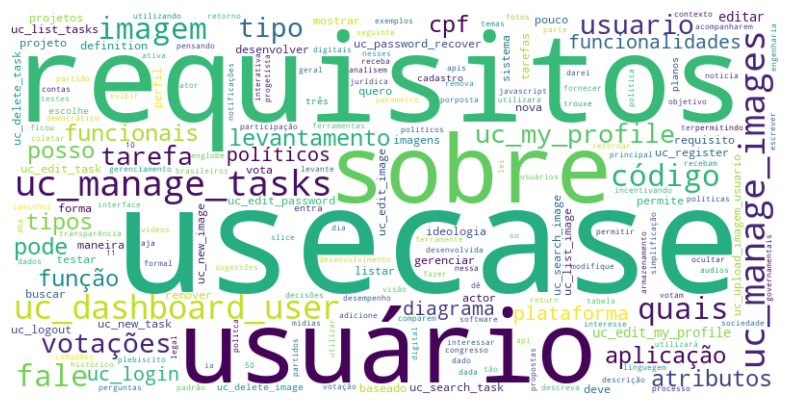

In [36]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
liked_grouped = df.groupby('liked_interaction')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
liked_grouped['word_count'] = liked_grouped['prompt'].apply(lambda text: get_word_counts(text))

# Exibir o DataFrame agrupado
print(liked_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
word_count_dict = liked_grouped.iloc[1]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Obter as 20 palavras mais frequentes
top_words = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

# Criar DataFrame para exibição
df_top_words = pd.DataFrame(top_words, columns=["Palavra", "Frequência"])

print(df_top_words)
# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras - Interações Curtidas')
plt.show()

   liked_interaction                                             prompt  \
0              False  Me fale sobre testes  RNF01\nResponsividade e ...   
1               True  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'fale': 2, 'sobre': 7, 'rnf01': 1, 'responsiv...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  
              Palavra  Frequência
0               sobre           8
1     uc_manage_tasks           7
2    uc_manage_images           7
3   uc_dashboard_user           6
4                fale           5
5               quais           5
6              código           5
7              imagem           5
8                tipo           4
9            votações           4
10            usuario           4
11      uc_my_profile           4
12             tarefa           4
13              posso           3
14         funcionais           3
15          aplicação           3
16       levantamento          

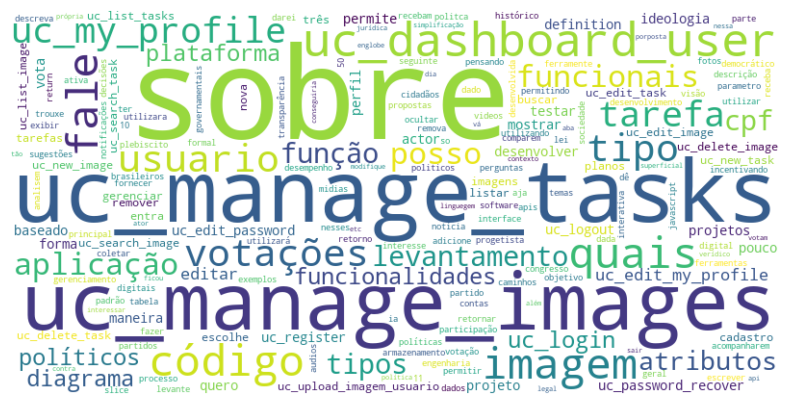

In [37]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
liked_grouped = df.groupby('liked_interaction')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
liked_grouped['word_count'] = liked_grouped['prompt'].apply(lambda text: get_word_counts(text, palavras_para_remover=palavras_para_remover))

# Exibir o DataFrame agrupado
print(liked_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
word_count_dict = liked_grouped.iloc[1]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Obter as 20 palavras mais frequentes
top_words = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

# Criar DataFrame para exibição
df_top_words_filtered = pd.DataFrame(top_words, columns=["Palavra", "Frequência"])

print(df_top_words_filtered)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras - Interações Curtidas (Com Filtro)')
plt.show()

#### Para o Não Curtido

   liked_interaction                                             prompt  \
0              False  Me fale sobre testes  RNF01\nResponsividade e ...   
1               True  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'fale': 2, 'sobre': 7, 'testes': 2, 'rnf01': ...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  
        Palavra  Frequência
0    requisitos          10
1         sobre           7
2          deve           6
3         dados           6
4      usuários           6
5      software           5
6       sistema           4
7        acesso           4
8      político           4
9    funcionais           4
10        casos           4
11          uso           4
12   diferentes           3
13   plataforma           3
14      usuário           3
15        forma           3
16  comentários           3
17         caso           3
18         rede           3
19       social           3


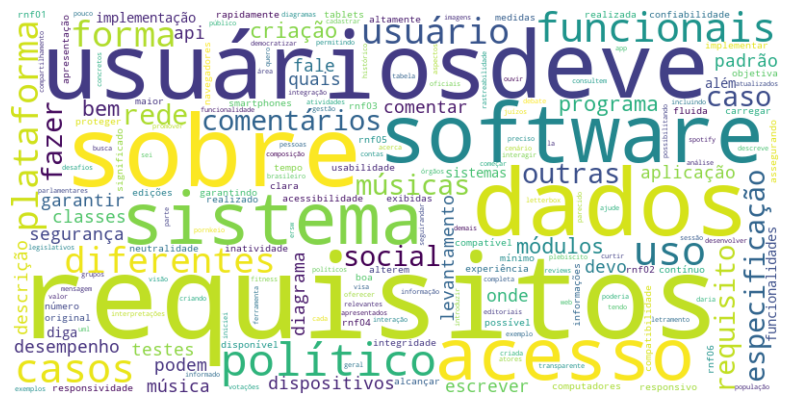

In [38]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
disliked_grouped = df.groupby('liked_interaction')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
disliked_grouped['word_count'] = disliked_grouped['prompt'].apply(lambda text: get_word_counts(text))

# Exibir o DataFrame agrupado
print(disliked_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
# word_count_dict = disliked_grouped.iloc[1]['word_count']
word_count_dict = disliked_grouped.iloc[0]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Obter as 20 palavras mais frequentes
top_words = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

# Criar DataFrame para exibição
df_top_words_disliked = pd.DataFrame(top_words, columns=["Palavra", "Frequência"])

print(df_top_words_disliked)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras - Interações Não Curtidas (Sem Filtro)')
plt.show()

   liked_interaction                                             prompt  \
0              False  Me fale sobre testes  RNF01\nResponsividade e ...   
1               True  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'fale': 2, 'sobre': 7, 'rnf01': 1, 'responsiv...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  
          Palavra  Frequência
0           sobre           7
1           dados           6
2        software           5
3          acesso           4
4        político           4
5      funcionais           4
6      diferentes           3
7      plataforma           3
8           forma           3
9     comentários           3
10           rede           3
11         social           3
12        músicas           3
13          fazer           3
14  especificação           3
15         outras           3
16        criação           3
17        módulos           3
18            bem           3
19       

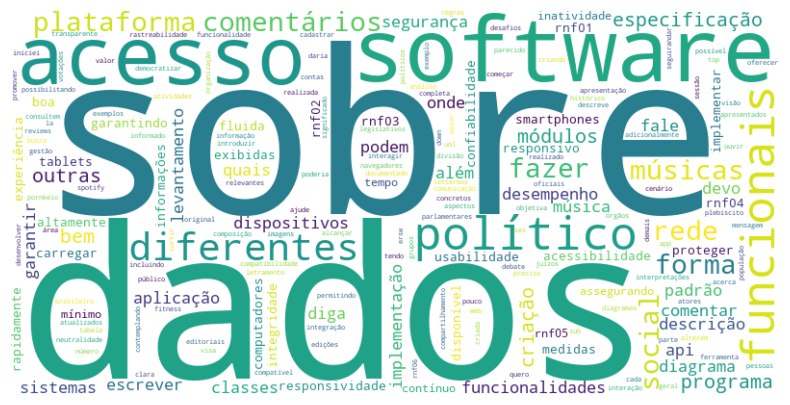

In [39]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
disliked_grouped = df.groupby('liked_interaction')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
disliked_grouped['word_count'] = disliked_grouped['prompt'].apply(lambda text: get_word_counts(text, palavras_para_remover=palavras_para_remover))

# Exibir o DataFrame agrupado
print(disliked_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
# word_count_dict = disliked_grouped.iloc[1]['word_count']
word_count_dict = liked_grouped.iloc[0]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Obter as 20 palavras mais frequentes
top_words = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

# Criar DataFrame para exibição
df_top_words_disliked_filtered = pd.DataFrame(top_words, columns=["Palavra", "Frequência"])

print(df_top_words_disliked_filtered)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras - Interações Não Curtidas (Com Filtro)')
plt.show()

#### Por Nível de Expertise com Programação - APENAS_ESTUDANTE

    expertise_level                                             prompt  \
0  APENAS ESTUDANTE  RNF01\nResponsividade e Acessibilidade\n\n\nO ...   
1   ATUA NO MERCADO  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'rnf01': 1, 'responsividade': 1, 'acessibilid...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  


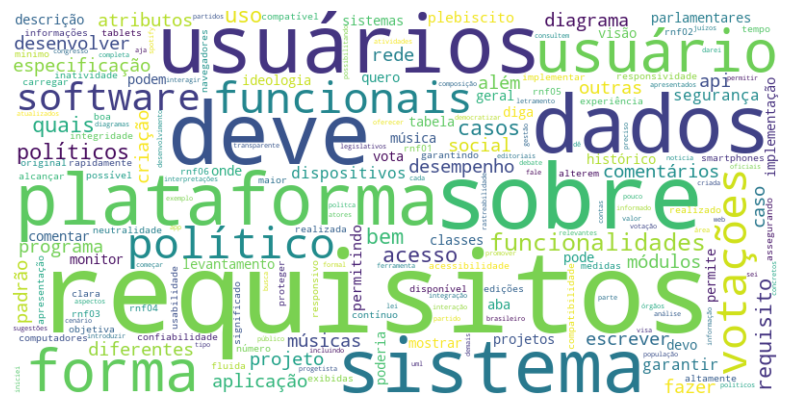

In [40]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
expertise_grouped = df.groupby('expertise_level')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
expertise_grouped['word_count'] = expertise_grouped['prompt'].apply(lambda text: get_word_counts(text))

# Exibir o DataFrame agrupado
print(expertise_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
word_count_dict = expertise_grouped.iloc[0]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras Sem Filtro - Apenas Estudante')
plt.show()

    expertise_level                                             prompt  \
0  APENAS ESTUDANTE  RNF01\nResponsividade e Acessibilidade\n\n\nO ...   
1   ATUA NO MERCADO  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'rnf01': 1, 'responsividade': 1, 'acessibilid...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  


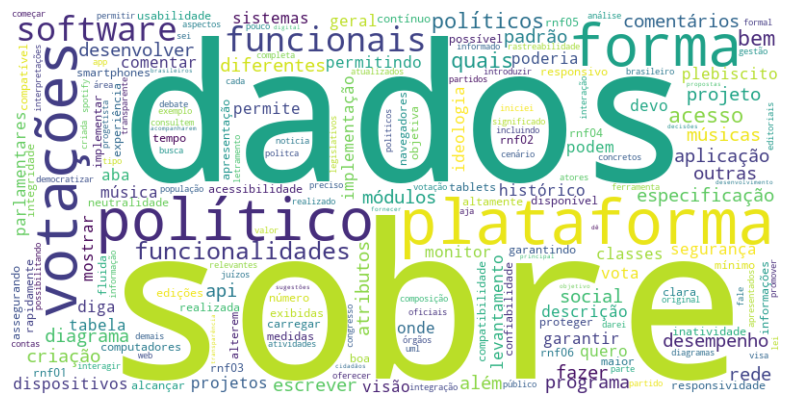

In [41]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
expertise_grouped = df.groupby('expertise_level')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
expertise_grouped['word_count'] = expertise_grouped['prompt'].apply(lambda text: get_word_counts(text, palavras_para_remover=palavras_para_remover))

# Exibir o DataFrame agrupado
print(expertise_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
word_count_dict = expertise_grouped.iloc[0]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras Com Filtro - Apenas Estudante')
plt.show()

#### Por Nível de Expertise com Programação - ESTAGIÁRIO

    expertise_level                                             prompt  \
0  APENAS ESTUDANTE  RNF01\nResponsividade e Acessibilidade\n\n\nO ...   
1   ATUA NO MERCADO  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'rnf01': 1, 'responsividade': 1, 'acessibilid...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  


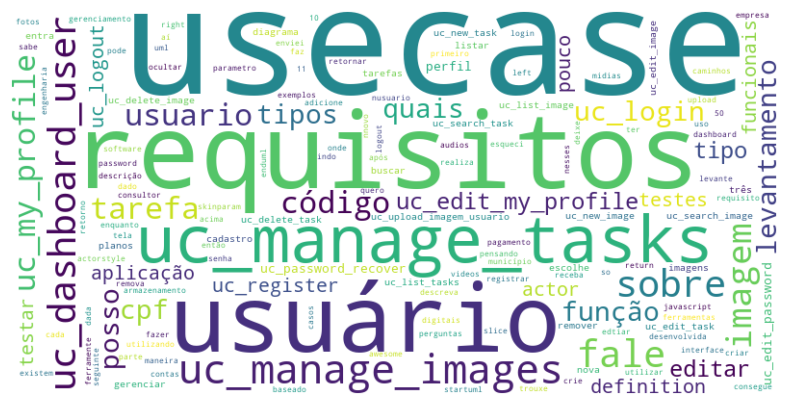

In [42]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
expertise_grouped = df.groupby('expertise_level')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
expertise_grouped['word_count'] = expertise_grouped['prompt'].apply(lambda text: get_word_counts(text))

# Exibir o DataFrame agrupado
print(expertise_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
word_count_dict = expertise_grouped.iloc[1]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras Sem Filtro - Estagiário')
plt.show()

    expertise_level                                             prompt  \
0  APENAS ESTUDANTE  RNF01\nResponsividade e Acessibilidade\n\n\nO ...   
1   ATUA NO MERCADO  Me de exemplos de perguntas que posso fazer so...   

                                          word_count  
0  {'rnf01': 1, 'responsividade': 1, 'acessibilid...  
1  {'exemplos': 1, 'perguntas': 1, 'posso': 3, 'f...  


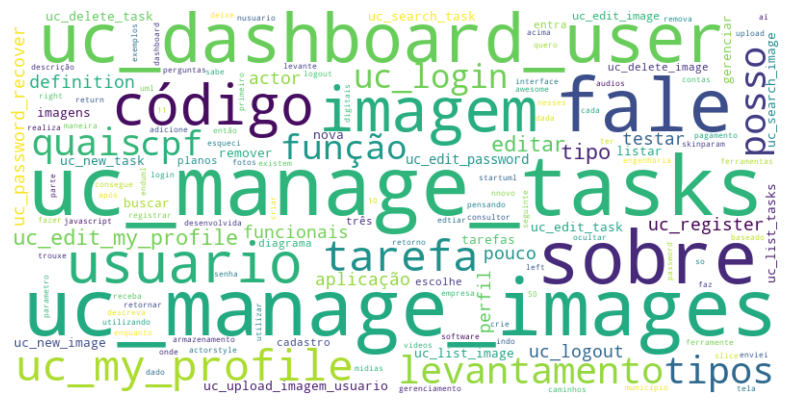

In [43]:

# Agrupar por 'liked_interaction' e calcular frequências de palavras
expertise_grouped = df.groupby('expertise_level')['prompt'].apply(lambda x: ' '.join(x)).reset_index()

# Aplicar CountVectorizer novamente para cada grupo e converter para um dicionário de contagem de palavras
expertise_grouped['word_count'] = expertise_grouped['prompt'].apply(lambda text: get_word_counts(text, palavras_para_remover=palavras_para_remover))

# Exibir o DataFrame agrupado
print(expertise_grouped.head())

# Selecionar o dicionário de contagem de palavras do grupo desejado
word_count_dict = expertise_grouped.iloc[1]['word_count']

# Gerar uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desativar os eixos
# plt.title('Nuvem de Palavras Com Filtro - Estagiário')
plt.show()

### Extração de tópicos

#### 1 - Sem filtro de classe

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# from nltk.corpus import stopwords
# import nltk

# # Baixar as stopwords em português, caso ainda não tenha
# nltk.download('stopwords')

# # Stopwords em português brasileiro
# stop_words_pt = stopwords.words('portuguese')

# # Preparar os dados
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
# dtm = vectorizer.fit_transform(df['prompt'])

# # Treinar o modelo LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(dtm)

# # Número de palavras mais relevantes por tópico
# no_top_words = 10

# # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
# topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

# # Ordenar os tópicos pela soma dos pesos em ordem decrescente
# topic_sums.sort(key=lambda x: x[1], reverse=True)

# # Criar um mapeamento de índice original para índice renumerado (1 a 5)
# topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

# # Função para exibir os tópicos ordenados e numerados de 1 a 5
# def display_topics_sorted(model, feature_names, no_top_words):
#     """
#     Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#     """
#     topics = []

#     for topic_idx, _ in topic_sums:
#         topic = model.components_[topic_idx]
#         sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topics.append((topic_mapping[topic_idx], sorted_words))

#     # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#     topics.sort(key=lambda x: x[0])

#     for topic_idx, words in topics:
#         print(f"Tópico {topic_idx}:")
#         print(", ".join(words))

# # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
# display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words)

# # Obter distribuição dos tópicos nos documentos
# topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
# topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

# # Criar gráfico de barras para a distribuição dos tópicos nos documentos
# plt.figure(figsize=(10, 5))
# # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

# sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

# # Renumerar os tópicos no gráfico para 1 a 5
# topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

# plt.bar(
#     topic_labels, 
#     topic_frequencies[sorted_indices], 
# )

# # Adicionar valores no topo de cada barra
# for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# plt.xlabel("Tópicos")
# plt.ylabel("Frequência nos Documentos")
# # plt.title("Distribuição dos Tópicos nos Documentos")
# plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
# plt.show()

In [ ]:
# # Importar as bibliotecas necessárias
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import matplotlib.pyplot as plt
# import numpy as np

# # Stopwords personalizadas (somando as já existentes com palavras adicionais)
# stop_words_pt = stopwords.words('portuguese') + palavras_para_remover

# # Preparar os dados para o modelo LDA
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
# dtm = vectorizer.fit_transform(df['prompt'])

# # Treinar o modelo LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(dtm)

# # Número de palavras mais relevantes por tópico
# no_top_words = 10

# # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
# topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

# # Ordenar os tópicos pela soma dos pesos em ordem decrescente
# topic_sums.sort(key=lambda x: x[1], reverse=True)

# # Criar um mapeamento de índice original para índice renumerado (1 a 5)
# topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

# # Função para exibir os tópicos ordenados e numerados de 1 a 5
# def display_topics_sorted(model, feature_names, no_top_words):
#     """
#     Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#     """
#     topics = []

#     for topic_idx, _ in topic_sums:
#         topic = model.components_[topic_idx]
#         sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topics.append((topic_mapping[topic_idx], sorted_words))

#     # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#     topics.sort(key=lambda x: x[0])

#     for topic_idx, words in topics:
#         print(f"Tópico {topic_idx}:")
#         print(", ".join(words))

# # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
# display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words)

# # Obter distribuição dos tópicos nos documentos
# topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
# topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

# # Criar gráfico de barras para a distribuição dos tópicos nos documentos
# plt.figure(figsize=(10, 5))
# # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

# sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

# # Renumerar os tópicos no gráfico para 1 a 5
# topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

# plt.bar(
#     topic_labels, 
#     topic_frequencies[sorted_indices], 
# )

# # Adicionar valores no topo de cada barra
# for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# plt.xlabel("Tópicos")
# plt.ylabel("Frequência nos Documentos")
# # plt.title("Distribuição dos Tópicos nos Documentos")
# plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
# plt.show()

#### 2 - Interações Curtidas

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# import nltk

# # Baixar as stopwords em português, caso ainda não tenha
# nltk.download('stopwords')

# # Stopwords em português brasileiro
# stop_words_pt = stopwords.words('portuguese')

# # Filtrar os registros onde 'liked_interaction' é True
# df_liked = df[df['liked_interaction'] == True]

# # Preparar os dados para o modelo LDA
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
# dtm = vectorizer.fit_transform(df_liked['prompt'])

# # Treinar o modelo LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(dtm)

# # Número de palavras mais relevantes por tópico
# no_top_words = 10

# # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
# topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

# # Ordenar os tópicos pela soma dos pesos em ordem decrescente
# topic_sums.sort(key=lambda x: x[1], reverse=True)

# # Criar um mapeamento de índice original para índice renumerado (1 a 5)
# topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

# # Função para exibir os tópicos ordenados e numerados de 1 a 5
# def display_topics_sorted(model, feature_names, no_top_words):
#     """
#     Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#     """
#     topics = []

#     for topic_idx, _ in topic_sums:
#         topic = model.components_[topic_idx]
#         sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topics.append((topic_mapping[topic_idx], sorted_words))

#     # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#     topics.sort(key=lambda x: x[0])

#     for topic_idx, words in topics:
#         print(f"Tópico {topic_idx}:")
#         print(", ".join(words))

# # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
# print("Tópicos extraídos dos registros em que 'liked_interaction' é True:")
# display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words)

# # Obter distribuição dos tópicos nos documentos
# topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
# topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

# # Criar gráfico de barras para a distribuição dos tópicos nos documentos
# plt.figure(figsize=(10, 5))
# # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

# sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

# # Renumerar os tópicos no gráfico para 1 a 5
# topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

# plt.bar(
#     topic_labels, 
#     topic_frequencies[sorted_indices], 
# )

# # Adicionar valores no topo de cada barra
# for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# plt.xlabel("Tópicos")
# plt.ylabel("Frequência nos Documentos")
# # plt.title("Distribuição dos Tópicos nos Documentos (Liked Interaction)")
# plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
# plt.show()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# import nltk

# # Baixar as stopwords em português, caso ainda não tenha
# nltk.download('stopwords')

# # Stopwords em português brasileiro
# stop_words_pt = stopwords.words('portuguese') + palavras_para_remover

# # Preparar os dados para o modelo LDA
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
# dtm = vectorizer.fit_transform(df_liked['prompt'])

# # Treinar o modelo LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(dtm)

# # Número de palavras mais relevantes por tópico
# no_top_words = 10

# # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
# topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

# # Ordenar os tópicos pela soma dos pesos em ordem decrescente
# topic_sums.sort(key=lambda x: x[1], reverse=True)

# # Criar um mapeamento de índice original para índice renumerado (1 a 5)
# topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

# # Função para exibir os tópicos ordenados e numerados de 1 a 5
# def display_topics_sorted(model, feature_names, no_top_words):
#     """
#     Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#     """
#     topics = []

#     for topic_idx, _ in topic_sums:
#         topic = model.components_[topic_idx]
#         sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topics.append((topic_mapping[topic_idx], sorted_words))

#     # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#     topics.sort(key=lambda x: x[0])

#     for topic_idx, words in topics:
#         print(f"Tópico {topic_idx}:")
#         print(", ".join(words))

# # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
# print("Tópicos extraídos dos registros em que 'liked_interaction' é True, com palavras filtradas:")
# display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words)

# # Obter distribuição dos tópicos nos documentos
# topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
# topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

# # Criar gráfico de barras para a distribuição dos tópicos nos documentos
# plt.figure(figsize=(10, 5))
# # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

# sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

# # Renumerar os tópicos no gráfico para 1 a 5
# topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

# plt.bar(
#     topic_labels, 
#     topic_frequencies[sorted_indices], 
# )

# # Adicionar valores no topo de cada barra
# for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# plt.xlabel("Tópicos")
# plt.ylabel("Frequência nos Documentos")
# # plt.title("Distribuição dos Tópicos nos Documentos (Liked Interaction)")
# plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
# plt.show()

#### 3 - Interações não curtidas

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# import nltk

# # Baixar as stopwords em português, caso ainda não tenha
# nltk.download('stopwords')

# # Stopwords em português brasileiro
# stop_words_pt = stopwords.words('portuguese')

# # Filtrar os registros onde 'liked_interaction' é False
# df_disliked = df[df['liked_interaction'] == False]

# # Preparar os dados para o modelo LDA
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
# dtm = vectorizer.fit_transform(df_disliked['prompt'])

# # Treinar o modelo LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(dtm)

# # Número de palavras mais relevantes por tópico
# no_top_words = 10

# # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
# topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

# # Ordenar os tópicos pela soma dos pesos em ordem decrescente
# topic_sums.sort(key=lambda x: x[1], reverse=True)

# # Criar um mapeamento de índice original para índice renumerado (1 a 5)
# topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

# # Função para exibir os tópicos ordenados e numerados de 1 a 5
# def display_topics_sorted(model, feature_names, no_top_words):
#     """
#     Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#     """
#     topics = []

#     for topic_idx, _ in topic_sums:
#         topic = model.components_[topic_idx]
#         sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topics.append((topic_mapping[topic_idx], sorted_words))

#     # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#     topics.sort(key=lambda x: x[0])

#     for topic_idx, words in topics:
#         print(f"Tópico {topic_idx}:")
#         print(", ".join(words))

# # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
# print("Tópicos extraídos dos registros em que 'liked_interaction' é False:")
# display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words)

# # Obter distribuição dos tópicos nos documentos
# topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
# topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

# # Criar gráfico de barras para a distribuição dos tópicos nos documentos
# plt.figure(figsize=(10, 5))
# # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

# sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

# # Renumerar os tópicos no gráfico para 1 a 5
# topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

# plt.bar(
#     topic_labels, 
#     topic_frequencies[sorted_indices], 
# )

# # Adicionar valores no topo de cada barra
# for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# plt.xlabel("Tópicos")
# plt.ylabel("Frequência nos Documentos")
# # plt.title("Distribuição dos Tópicos nos Documentos (Disliked Interaction)")
# plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
# plt.show()

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# import nltk

# # Baixar as stopwords em português, caso ainda não tenha
# nltk.download('stopwords')

# # Stopwords em português brasileiro
# stop_words_pt = stopwords.words('portuguese') + palavras_para_remover

# # Filtrar os registros onde 'liked_interaction' é False
# df_disliked = df[df['liked_interaction'] == False]

# # Preparar os dados para o modelo LDA
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
# dtm = vectorizer.fit_transform(df_disliked['prompt'])

# # Treinar o modelo LDA
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(dtm)

# # Número de palavras mais relevantes por tópico
# no_top_words = 10

# # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
# topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

# # Ordenar os tópicos pela soma dos pesos em ordem decrescente
# topic_sums.sort(key=lambda x: x[1], reverse=True)

# # Criar um mapeamento de índice original para índice renumerado (1 a 5)
# topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

# # Função para exibir os tópicos ordenados e numerados de 1 a 5
# def display_topics_sorted(model, feature_names, no_top_words):
#     """
#     Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#     """
#     topics = []

#     for topic_idx, _ in topic_sums:
#         topic = model.components_[topic_idx]
#         sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topics.append((topic_mapping[topic_idx], sorted_words))

#     # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#     topics.sort(key=lambda x: x[0])

#     for topic_idx, words in topics:
#         print(f"Tópico {topic_idx}:")
#         print(", ".join(words))

# # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
# print("Tópicos extraídos dos registros em que 'liked_interaction' é False, com palavras filtradas:")
# display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words)

# # Obter distribuição dos tópicos nos documentos
# topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
# topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

# # Criar gráfico de barras para a distribuição dos tópicos nos documentos
# plt.figure(figsize=(10, 5))
# # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

# sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

# # Renumerar os tópicos no gráfico para 1 a 5
# topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

# plt.bar(
#     topic_labels, 
#     topic_frequencies[sorted_indices], 
# )

# # Adicionar valores no topo de cada barra
# for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# plt.xlabel("Tópicos")
# plt.ylabel("Frequência nos Documentos")
# # plt.title("Distribuição dos Tópicos nos Documentos (Disliked Interaction)")
# plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
# plt.show()

#### 4 - Por nível de expertise

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# import nltk

# # Baixar as stopwords em português, caso ainda não tenha
# nltk.download('stopwords')

# # Stopwords em português brasileiro
# stop_words_pt = stopwords.words('portuguese')

# # Obter os níveis únicos de expertise no dataframe
# expertise_levels = df['expertise_level'].unique()

# for level in expertise_levels:
#     # Filtrar o dataframe pelo nível de expertise atual
#     df_level = df[df['expertise_level'] == level]

#     # Preparar os dados para o modelo LDA
#     vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
#     dtm = vectorizer.fit_transform(df_level['prompt'])

#     # Treinar o modelo LDA
#     lda = LatentDirichletAllocation(n_components=5, random_state=42)
#     lda.fit(dtm)

#     # Número de palavras mais relevantes por tópico
#     no_top_words = 10

#     # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
#     topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

#     # Ordenar os tópicos pela soma dos pesos em ordem decrescente
#     topic_sums.sort(key=lambda x: x[1], reverse=True)

#     # Criar um mapeamento de índice original para índice renumerado (1 a 5)
#     topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

#     # Função para exibir os tópicos ordenados e numerados de 1 a 5
#     def display_topics_sorted(model, feature_names, no_top_words, expertise_level):
#         """
#         Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#         """
#         topics = []

#         for topic_idx, _ in topic_sums:
#             topic = model.components_[topic_idx]
#             sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#             topics.append((topic_mapping[topic_idx], sorted_words))

#         # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#         topics.sort(key=lambda x: x[0])

#         print(f"\nTópicos extraídos para expertise_level = {expertise_level}:")
#         for topic_idx, words in topics:
#             print(f"Tópico {topic_idx}:")
#             print(", ".join(words))

#     # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
#     display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words, level)

#     # Obter distribuição dos tópicos nos documentos
#     topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
#     topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

#     # Criar gráfico de barras para a distribuição dos tópicos nos documentos
#     plt.figure(figsize=(10, 5))
#     # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

#     sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

#     # Renumerar os tópicos no gráfico para 1 a 5
#     topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

#     plt.bar(
#         topic_labels, 
#         topic_frequencies[sorted_indices], 
#     )

#     # Adicionar valores no topo de cada barra
#     for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#         yval = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

#     plt.xlabel("Tópicos")
#     plt.ylabel("Frequência nos Documentos")
#     # plt.title(f"Distribuição dos Tópicos nos Documentos (Expertise Level = {level})")
#     plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
#     plt.show()


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# import nltk

# # Baixar as stopwords em português, caso ainda não tenha
# nltk.download('stopwords')

# # Stopwords em português brasileiro
# stop_words_pt = stopwords.words('portuguese') + palavras_para_remover

# # Obter os níveis únicos de expertise no dataframe
# expertise_levels = df['expertise_level'].unique()

# for level in expertise_levels:
#     # Filtrar o dataframe pelo nível de expertise atual
#     df_level = df[df['expertise_level'] == level]

#     # Preparar os dados para o modelo LDA
#     vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words_pt)
#     dtm = vectorizer.fit_transform(df_level['prompt'])

#     # Treinar o modelo LDA
#     lda = LatentDirichletAllocation(n_components=5, random_state=42)
#     lda.fit(dtm)

#     # Número de palavras mais relevantes por tópico
#     no_top_words = 10

#     # Criar lista de tuplas (soma dos pesos do tópico, índice do tópico)
#     topic_sums = [(topic_idx, topic.sum()) for topic_idx, topic in enumerate(lda.components_)]

#     # Ordenar os tópicos pela soma dos pesos em ordem decrescente
#     topic_sums.sort(key=lambda x: x[1], reverse=True)

#     # Criar um mapeamento de índice original para índice renumerado (1 a 5)
#     topic_mapping = {old_idx: new_idx + 1 for new_idx, (old_idx, _) in enumerate(topic_sums)}

#     # Função para exibir os tópicos ordenados e numerados de 1 a 5
#     def display_topics_sorted(model, feature_names, no_top_words, expertise_level):
#         """
#         Exibe os tópicos ordenados pela soma dos pesos das palavras e numera de 1 a 5.
#         """
#         topics = []

#         for topic_idx, _ in topic_sums:
#             topic = model.components_[topic_idx]
#             sorted_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
#             topics.append((topic_mapping[topic_idx], sorted_words))

#         # Ordenar os tópicos pelo novo número (1 a 5) antes de exibir
#         topics.sort(key=lambda x: x[0])

#         print(f"\nTópicos extraídos para expertise_level = {expertise_level}:")
#         for topic_idx, words in topics:
#             print(f"Tópico {topic_idx}:")
#             print(", ".join(words))

#     # Exibir os tópicos ordenados por relevância (soma dos pesos), numerados de 1 a 5
#     display_topics_sorted(lda, vectorizer.get_feature_names_out(), no_top_words, level)

#     # Obter distribuição dos tópicos nos documentos
#     topic_distribution = lda.transform(dtm)  # Matriz de distribuição documento x tópico
#     topic_frequencies = np.sum(topic_distribution, axis=0)  # Soma das presenças de cada tópico

#     # Criar gráfico de barras para a distribuição dos tópicos nos documentos
#     plt.figure(figsize=(10, 5))
#     # sorted_indices = np.argsort(topic_frequencies)[::-1]  # Ordenar tópicos pela frequência (do maior para o menor)

#     sorted_indices = np.argsort([topic_mapping[i] for i in range(len(topic_frequencies))])

#     # Renumerar os tópicos no gráfico para 1 a 5
#     topic_labels = [f"Tópico {topic_mapping[i]}" for i in sorted_indices]

#     plt.bar(
#         topic_labels, 
#         topic_frequencies[sorted_indices], 
#     )

#     # Adicionar valores no topo de cada barra
#     for bar in plt.bar(topic_labels, topic_frequencies[sorted_indices]):
#         yval = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

#     plt.xlabel("Tópicos")
#     plt.ylabel("Frequência nos Documentos")
#     # plt.title(f"Distribuição dos Tópicos nos Documentos (Expertise Level = {level})")
#     plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura
#     plt.show()


### Análise de N-gramas

#### 1 - Sem filtro

[nltk_data] Downloading package stopwords to /Users/ghost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/3546927557.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prompt'].fillna('', inplace=True)


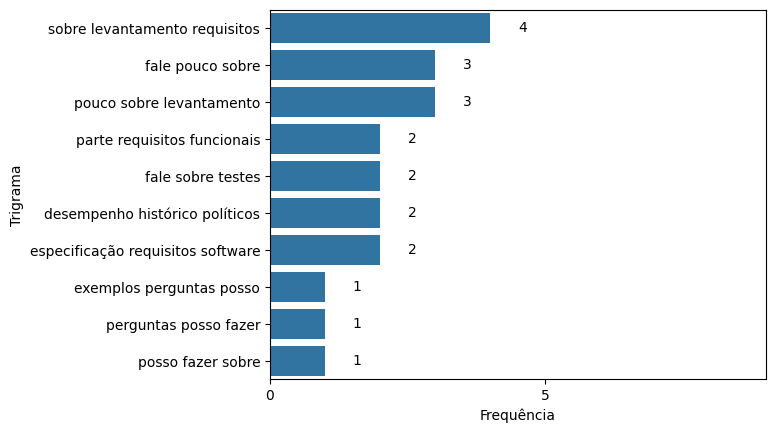

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Função para exibir os n-gramas mais frequentes
def get_top_n_grams(corpus, n=None, ngram_range=(1, 1), filtrar_palavras=False):
    stop_words = stopwords.words('portuguese')
    if filtrar_palavras:
        stop_words = stop_words + palavras_para_remover
    vec = CountVectorizer(ngram_range=ngram_range, stop_words = stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Preencher valores NaN com strings vazias
df['prompt'].fillna('', inplace=True)

# Obter os bigramas mais frequentes
top_trigrams = get_top_n_grams(df['prompt'], n=10, ngram_range=(3, 3))

# Visualizar os bigramas
df_trigrams = pd.DataFrame(top_trigrams, columns=['Trigrama', 'Frequência'])
ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams)

for index, value in enumerate(df_trigrams['Frequência']):
    ax.text(value + 0.5, index, str(value), va='center')

plt.xlim(0, max(df_trigrams['Frequência']) + 5)

plt.xticks(range(0, max(df_trigrams['Frequência']) + 6, 5))

plt.show()

[('fale pouco sobre', np.int64(3)), ('pouco sobre levantamento', np.int64(3)), ('desempenho histórico políticos', np.int64(2)), ('exemplos perguntas posso', np.int64(1)), ('perguntas posso fazer', np.int64(1)), ('posso fazer sobre', np.int64(1)), ('fazer sobre funcionais', np.int64(1)), ('sobre funcionais aplicação', np.int64(1)), ('fale quais tipos', np.int64(1)), ('descreva parte funcionais', np.int64(1))]


[nltk_data] Downloading package stopwords to /Users/ghost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/6r/tk20j5ds5r56fx8xqt6r4z440000gn/T/ipykernel_3164/3431104674.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prompt'].fillna('', inplace=True)


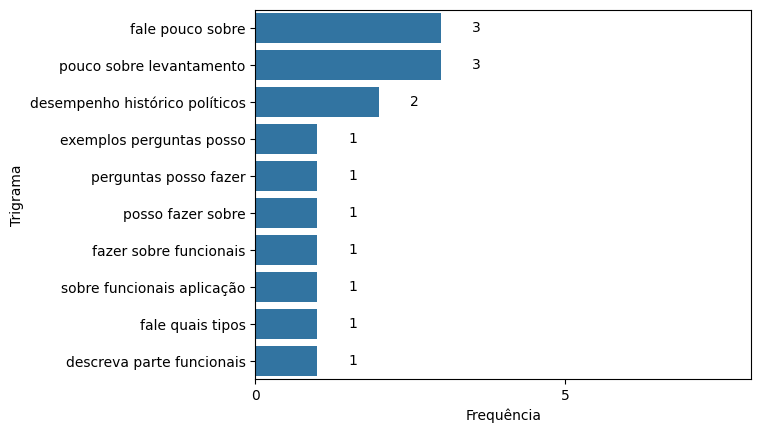

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Preencher valores NaN com strings vazias
df['prompt'].fillna('', inplace=True)

# Obter os bigramas mais frequentes
top_trigrams = get_top_n_grams(df['prompt'], n=10, ngram_range=(3, 3), filtrar_palavras=True)
print(top_trigrams)

# Visualizar os bigramas
df_trigrams = pd.DataFrame(top_trigrams, columns=['Trigrama', 'Frequência'])
ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams)

for index, value in enumerate(df_trigrams['Frequência']):
    ax.text(value + 0.5, index, str(value), va='center')

plt.xlim(0, max(df_trigrams['Frequência']) + 5)

plt.xticks(range(0, max(df_trigrams['Frequência']) + 6, 5))

plt.show()

#### 2 - Interações Curtidas

Trigramas mais frequentes em 'liked_interaction = True':
[('sobre levantamento requisitos', np.int64(3)), ('fale pouco sobre', np.int64(2)), ('pouco sobre levantamento', np.int64(2)), ('exemplos perguntas posso', np.int64(1)), ('perguntas posso fazer', np.int64(1)), ('posso fazer sobre', np.int64(1)), ('fazer sobre requisitos', np.int64(1)), ('sobre requisitos funcionais', np.int64(1)), ('requisitos funcionais aplicação', np.int64(1)), ('fale quais tipos', np.int64(1))]


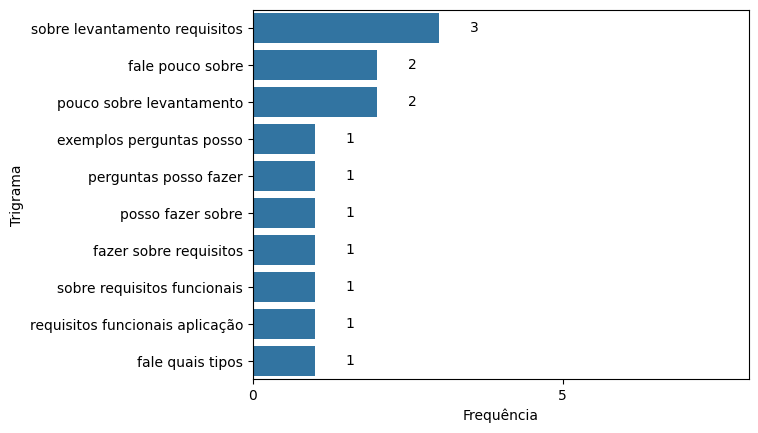

In [46]:
# Filtro por registros onde 'liked_interaction' é True
df_liked = df[df['liked_interaction'] == True]

# Obter os trigramas mais frequentes
top_trigrams_liked = get_top_n_grams(df_liked['prompt'], n=10, ngram_range=(3, 3))   
print("Trigramas mais frequentes em 'liked_interaction = True':")
print(top_trigrams_liked)

# Visualizar os trigramas
df_trigrams_liked = pd.DataFrame(top_trigrams_liked, columns=['Trigrama', 'Frequência'])

ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams_liked)

for index, value in enumerate(df_trigrams_liked['Frequência']):
    ax.text(value + 0.5, index, str(value), va='center')

plt.xlim(0, max(df_trigrams_liked['Frequência']) + 5)

plt.xticks(range(0, max(df_trigrams_liked['Frequência']) + 6, 5))

plt.show()


Trigramas mais frequentes em 'liked_interaction = True':
[('sobre levantamento', np.int64(3)), ('fale pouco', np.int64(2)), ('pouco sobre', np.int64(2)), ('fale sobre', np.int64(2)), ('quais atributos', np.int64(2)), ('exemplos perguntas', np.int64(1)), ('perguntas posso', np.int64(1)), ('posso fazer', np.int64(1)), ('fazer sobre', np.int64(1)), ('sobre funcionais', np.int64(1))]


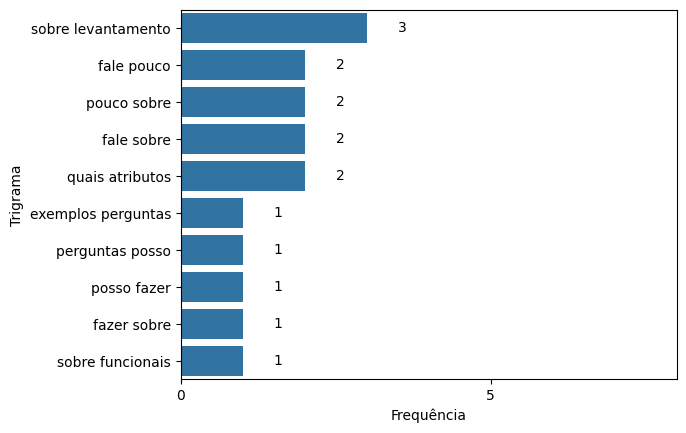

In [47]:
# Filtro por registros onde 'liked_interaction' é True
df_liked = df[df['liked_interaction'] == True]

# Obter os trigramas mais frequentes
top_trigrams_liked = get_top_n_grams(df_liked['prompt'], n=10, ngram_range=(2, 2), filtrar_palavras=True)   
print("Trigramas mais frequentes em 'liked_interaction = True':")
print(top_trigrams_liked)

# Visualizar os trigramas
df_trigrams_liked = pd.DataFrame(top_trigrams_liked, columns=['Trigrama', 'Frequência'])

ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams_liked)

for index, value in enumerate(df_trigrams_liked['Frequência']):
    ax.text(value + 0.5, index, str(value), va='center')

plt.xlim(0, max(df_trigrams_liked['Frequência']) + 5)

plt.xticks(range(0, max(df_trigrams_liked['Frequência']) + 6, 5))

plt.show()


#### 3 - Interações Não Curtidas

Trigramas mais frequentes em liked_interaction = False:
[('especificação requisitos software', np.int64(2)), ('fale sobre testes', np.int64(1)), ('rnf01 responsividade acessibilidade', np.int64(1)), ('responsividade acessibilidade sistema', np.int64(1)), ('acessibilidade sistema deve', np.int64(1)), ('sistema deve responsivo', np.int64(1)), ('deve responsivo garantindo', np.int64(1)), ('responsivo garantindo acesso', np.int64(1)), ('garantindo acesso boa', np.int64(1)), ('acesso boa usabilidade', np.int64(1))]


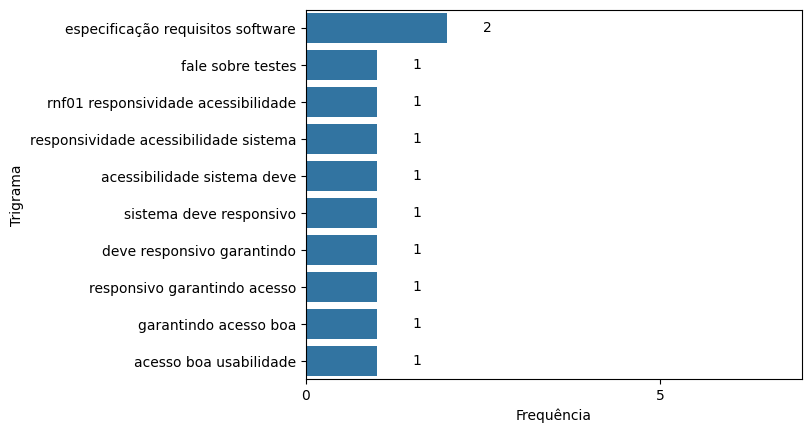

In [48]:
# Filtro por registros onde 'disliked_interaction' é True
df_disliked = df[df['liked_interaction'] == False]

# Obter os trigramas mais frequentes
top_trigrams_disliked = get_top_n_grams(df_disliked['prompt'], n=10, ngram_range=(3, 3))
print("Trigramas mais frequentes em liked_interaction = False:")
print(top_trigrams_disliked)

# Visualizar os trigramas
df_trigrams_disliked = pd.DataFrame(top_trigrams_disliked, columns=['Trigrama', 'Frequência'])

ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams_disliked)

for index, value in enumerate(df_trigrams_disliked['Frequência']):
    ax.text(value + 0.5, index, str(value), va='center')

plt.xlim(0, max(df_trigrams_disliked['Frequência']) + 5)

plt.xticks(range(0, max(df_trigrams_disliked['Frequência']) + 6, 5))

plt.show()

Trigramas mais frequentes em 'disliked_interaction = True':
[('rede social', np.int64(3)), ('diferentes dispositivos', np.int64(2)), ('especificação software', np.int64(2)), ('escrever descrição', np.int64(2)), ('diagrama classes', np.int64(2)), ('fale sobre', np.int64(1)), ('rnf01 responsividade', np.int64(1)), ('responsividade acessibilidade', np.int64(1)), ('acessibilidade responsivo', np.int64(1)), ('responsivo garantindo', np.int64(1))]


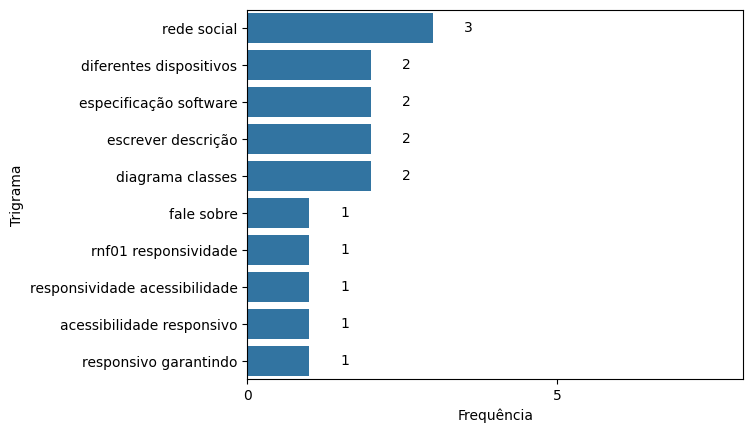

In [49]:
df_disliked = df[df['liked_interaction'] == False]

# Obter os trigramas mais frequentes
top_trigrams_disliked = get_top_n_grams(df_disliked['prompt'], n=10, ngram_range=(2, 2), filtrar_palavras=True)
print("Trigramas mais frequentes em 'disliked_interaction = True':")
print(top_trigrams_disliked)

# Visualizar os trigramas
df_trigrams_disliked = pd.DataFrame(top_trigrams_disliked, columns=['Trigrama', 'Frequência'])

ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams_disliked)

for index, value in enumerate(df_trigrams_disliked['Frequência']):
    ax.text(value + 0.5, index, str(value), va='center')

plt.xlim(0, max(df_trigrams_disliked['Frequência']) + 5)

plt.xticks(range(0, max(df_trigrams_disliked['Frequência']) + 6, 5))

plt.show()

#### 4 - Nível de Expertise

Trigramas mais frequentes para expertise_level = ATUA NO MERCADO:
[('sobre levantamento', np.int64(3)), ('levantamento requisitos', np.int64(3)), ('fale sobre', np.int64(3)), ('usecase editar', np.int64(3)), ('requisitos funcionais', np.int64(2)), ('fale pouco', np.int64(2)), ('pouco sobre', np.int64(2)), ('tipos requisitos', np.int64(2)), ('sobre testes', np.int64(2)), ('usecase gerenciar', np.int64(2))]


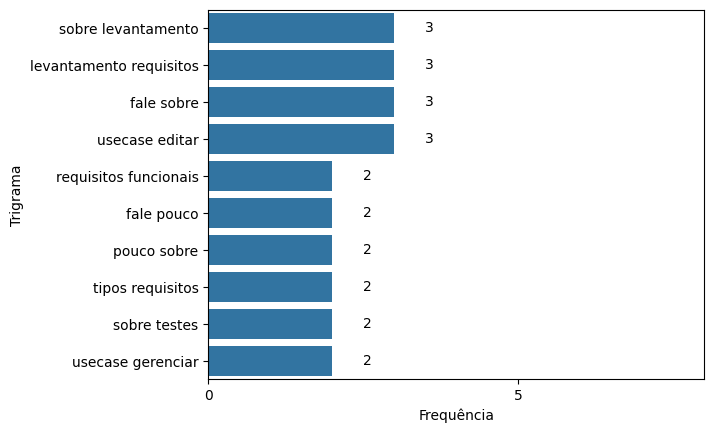

Trigramas mais frequentes para expertise_level = APENAS ESTUDANTE:
[('requisitos funcionais', np.int64(4)), ('sistema deve', np.int64(3)), ('rede social', np.int64(3)), ('casos uso', np.int64(3)), ('especificação requisitos', np.int64(3)), ('diferentes dispositivos', np.int64(2)), ('plataforma deve', np.int64(2)), ('permitindo usuários', np.int64(2)), ('desempenho histórico', np.int64(2)), ('histórico políticos', np.int64(2))]


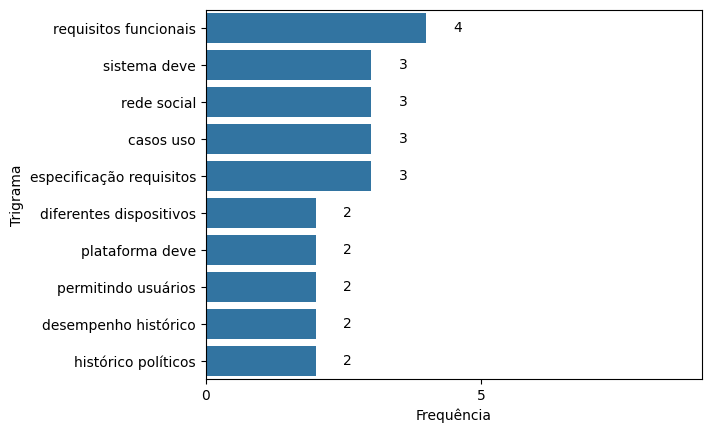

In [50]:
# Obter os níveis únicos de expertise
expertise_levels = df['expertise_level'].unique()

# Iterar sobre cada nível de expertise
for level in expertise_levels:
    df_expertise = df[df['expertise_level'] == level]

    # Obter os trigramas mais frequentes
    top_trigrams_expertise = get_top_n_grams(df_expertise['prompt'], n=10, ngram_range=(2, 2))

    print(f"Trigramas mais frequentes para expertise_level = {level}:")
    print(top_trigrams_expertise)

    # Criar DataFrame para visualização
    df_trigrams_expertise = pd.DataFrame(top_trigrams_expertise, columns=['Trigrama', 'Frequência'])

    # Criar o gráfico para cada nível de expertise
    # plt.figure(figsize=(10, 5))
    ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams_expertise)

    for index, value in enumerate(df_trigrams_expertise['Frequência']):
        ax.text(value + 0.5, index, str(value), va='center')

    plt.xlim(0, max(df_trigrams_expertise['Frequência']) + 5)
    plt.xticks(range(0, max(df_trigrams_expertise['Frequência']) + 6, 5))
    # plt.title(f"Trigramas mais frequentes para expertise_level = {level}")
    plt.show()

Trigramas mais frequentes para expertise_level = ATUA NO MERCADO:
[('sobre levantamento', np.int64(3)), ('fale sobre', np.int64(3)), ('fale pouco', np.int64(2)), ('pouco sobre', np.int64(2)), ('exemplos perguntas', np.int64(1)), ('perguntas posso', np.int64(1)), ('posso fazer', np.int64(1)), ('fazer sobre', np.int64(1)), ('sobre funcionais', np.int64(1)), ('funcionais aplicação', np.int64(1))]


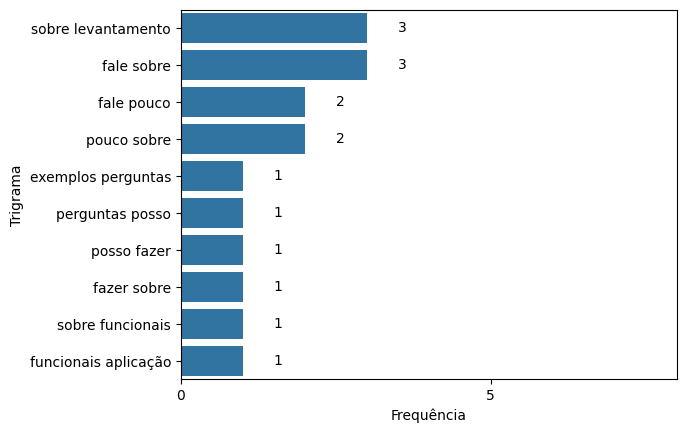

Trigramas mais frequentes para expertise_level = APENAS ESTUDANTE:
[('rede social', np.int64(3)), ('diferentes dispositivos', np.int64(2)), ('desempenho histórico', np.int64(2)), ('histórico políticos', np.int64(2)), ('especificação software', np.int64(2)), ('padrão escrever', np.int64(2)), ('escrever descrição', np.int64(2)), ('quais atributos', np.int64(2)), ('visão geral', np.int64(2)), ('diagrama classes', np.int64(2))]


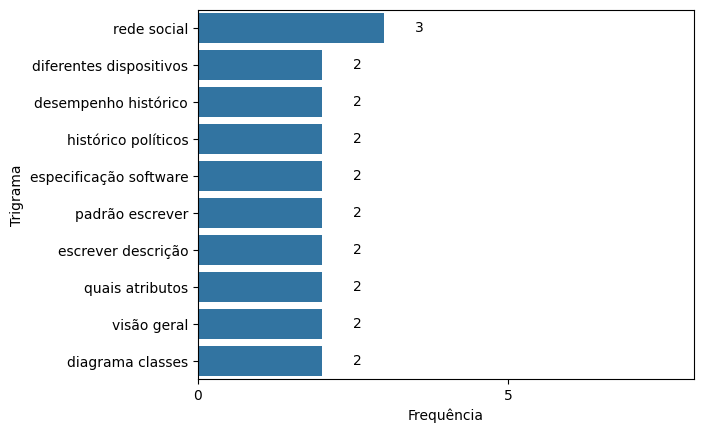

In [51]:
# Obter os níveis únicos de expertise
expertise_levels = df['expertise_level'].unique()

# Iterar sobre cada nível de expertise
for level in expertise_levels:
    df_expertise = df[df['expertise_level'] == level]

    # Obter os trigramas mais frequentes
    top_trigrams_expertise = get_top_n_grams(df_expertise['prompt'], n=10, ngram_range=(2, 2), filtrar_palavras=True)
    print(f"Trigramas mais frequentes para expertise_level = {level}:")
    print(top_trigrams_expertise)

    # Visualizar os trigramas
    df_trigrams_expertise = pd.DataFrame(top_trigrams_expertise, columns=['Trigrama', 'Frequência'])
    ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams_expertise)

    for index, value in enumerate(df_trigrams_expertise['Frequência']):
        ax.text(value + 0.5, index, str(value), va='center')

    plt.xlim(0, max(df_trigrams_expertise['Frequência']) + 5)

    plt.xticks(range(0, max(df_trigrams_expertise['Frequência']) + 6, 5))

    plt.show()

### Extração de Palavras-Chave

In [115]:
# from rake_nltk import Rake
# import nltk
# import pandas as pd
# from nltk.corpus import stopwords
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer

# # Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')

# # Inicializar stopwords em português
# stop_words = stopwords.words('portuguese')

# # Função para inicializar o Rake com ou sem filtro de palavras adicionais
# def initialize_rake(filtrar_palavras=False, palavras_para_remover=[]):
#     if filtrar_palavras:
#         stop_words_filtered = stop_words + palavras_para_remover
#     else:
#         stop_words_filtered = stop_words
#     return Rake(stopwords=stop_words_filtered)

# # Função para extrair palavras-chave com Rake
# def extract_keywords(text, filtrar_palavras=False, palavras_para_remover=[]):
#     r = initialize_rake(filtrar_palavras, palavras_para_remover)
#     r.extract_keywords_from_text(text)
#     return r.get_ranked_phrases()

# # Função para gerar nuvem de palavras
# def generate_wordcloud(keywords, title):
#     text = ' '.join(keywords)
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()

# # Função para obter N-gramas mais frequentes
# def get_top_n_grams(corpus, n=None, ngram_range=(1, 1), filtrar_palavras=False, palavras_para_remover=[]):
#     stop_words_local = stop_words
#     if filtrar_palavras:
#         stop_words_local = stop_words_local + palavras_para_remover
#     vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words_local).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
#     return words_freq[:n]

# # Filtros e processamento
# filters = {
#     "liked_interaction": df['liked_interaction'] == True,
#     "disliked_interaction": df['liked_interaction'] == False,
#     "expertise_level": df['expertise_level']
# }

# # Aplicar filtros e gerar nuvem de palavras e N-gramas
# for filter_name, filter_condition in filters.items():
#     if filter_name == "expertise_level":
#         # Filtrar por cada nível de expertise
#         for level in df['expertise_level'].unique():
#             df_filtered = df[df['expertise_level'] == level]
#             grouped_text = ' '.join(df_filtered['combined_text'])

#             # Extração de palavras-chave sem filtragem
#             keywords = extract_keywords(grouped_text, filtrar_palavras=False)
#             print(f"Palavras-chave para expertise_level = {level} (sem filtro):")
#             print(keywords)
#             generate_wordcloud(keywords, f"Nuvem de Palavras para expertise_level = {level} (sem filtro)")

#             # Extração de palavras-chave com filtragem
#             keywords_filtered = extract_keywords(grouped_text, filtrar_palavras=True, palavras_para_remover=palavras_para_remover)
#             print(f"Palavras-chave para expertise_level = {level} (com filtro):")
#             print(keywords_filtered)
#             generate_wordcloud(keywords_filtered, f"Nuvem de Palavras para expertise_level = {level} (com filtro)")

#     else:
#         # Filtrar por liked_interaction ou disliked_interaction
#         df_filtered = df[filter_condition]
#         grouped_text = ' '.join(df_filtered['combined_text'])

#         # Extração de palavras-chave sem filtragem
#         keywords = extract_keywords(grouped_text, filtrar_palavras=False)
#         print(f"Palavras-chave para {filter_name} (sem filtro):")
#         print(keywords)
#         generate_wordcloud(keywords, f"Nuvem de Palavras para {filter_name} (sem filtro)")

#         # Extração de palavras-chave com filtragem
#         keywords_filtered = extract_keywords(grouped_text, filtrar_palavras=True, palavras_para_remover=palavras_para_remover)
#         print(f"Palavras-chave para {filter_name} (com filtro):")
#         print(keywords_filtered)
#         generate_wordcloud(keywords_filtered, f"Nuvem de Palavras para {filter_name} (com filtro)")


### Análise de Coocorrência

Top 10 coocorrências mais frequentes para Grafo de Coocorrência para liked_interaction:
uc_manage_images - uc_manage_tasks: 49
uc_dashboard_user - uc_manage_images: 42
uc_dashboard_user - uc_manage_tasks: 42
imagem - uc_manage_images: 35
imagem - uc_manage_tasks: 35
imagem - uc_dashboard_user: 30
tarefa - uc_manage_images: 28
tarefa - uc_manage_tasks: 28
uc_manage_images - uc_my_profile: 28
uc_manage_images - usuario: 28


[nltk_data] Downloading package stopwords to /Users/ghost/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


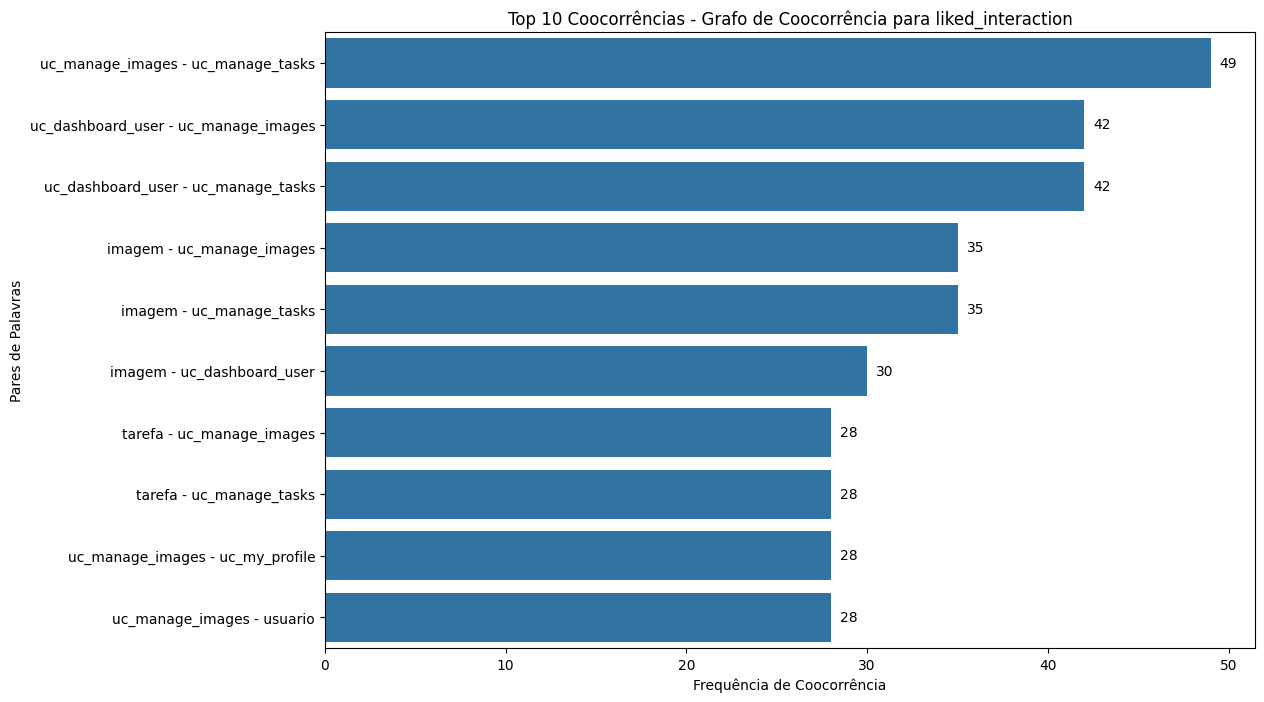

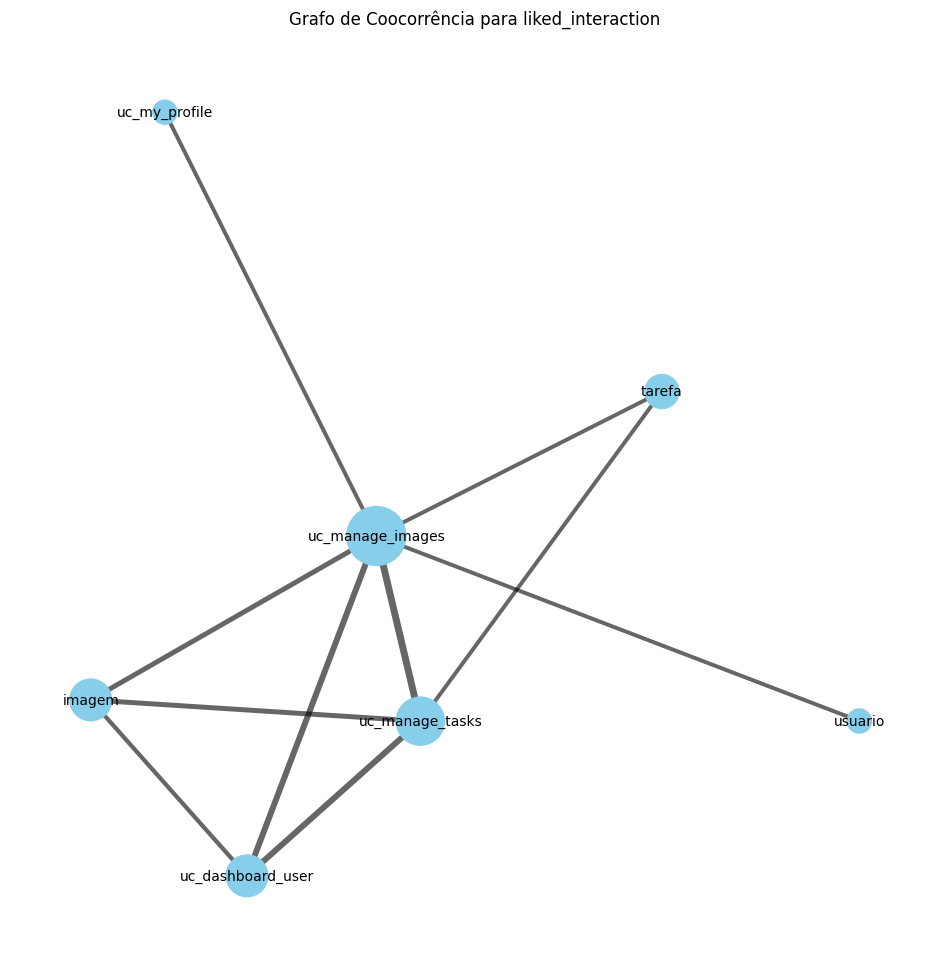

Top 10 coocorrências mais frequentes para Grafo de Coocorrência para disliked_interaction:
acesso - dados: 12
dados - diferentes: 8
dados - dispositivos: 8
dados - garantir: 8
dados - plataforma: 8
dados - segurança: 8
dados - sobre: 8
acesso - político: 6
acesso - sobre: 6
bem - módulos: 6


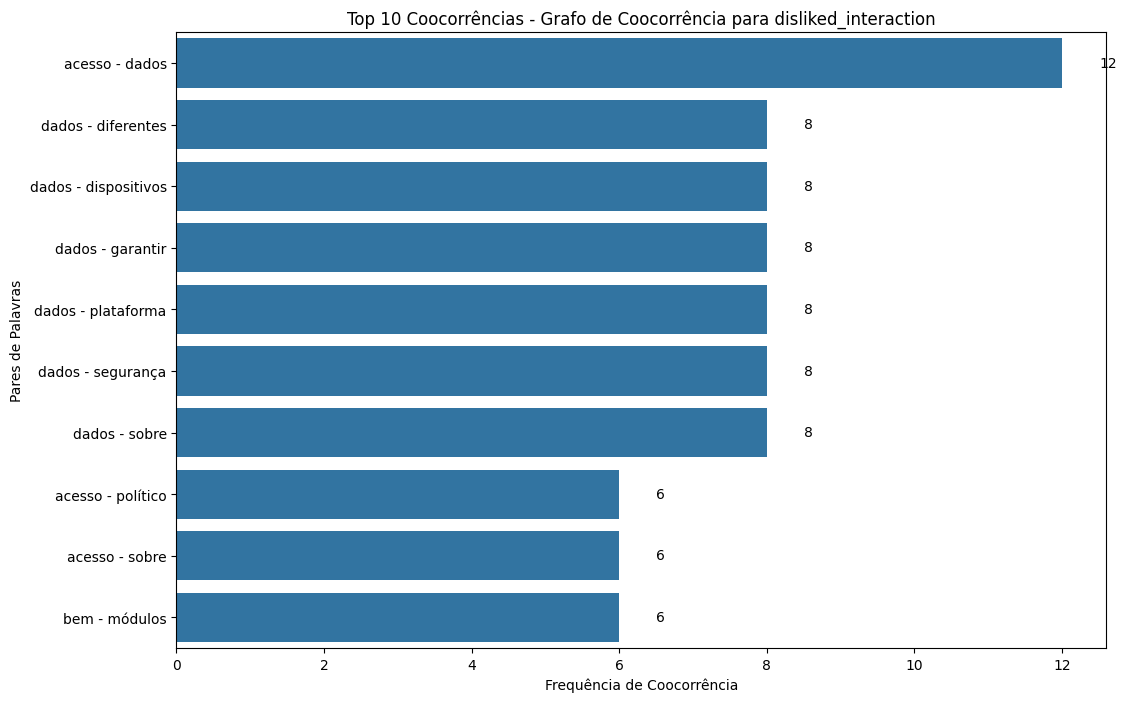

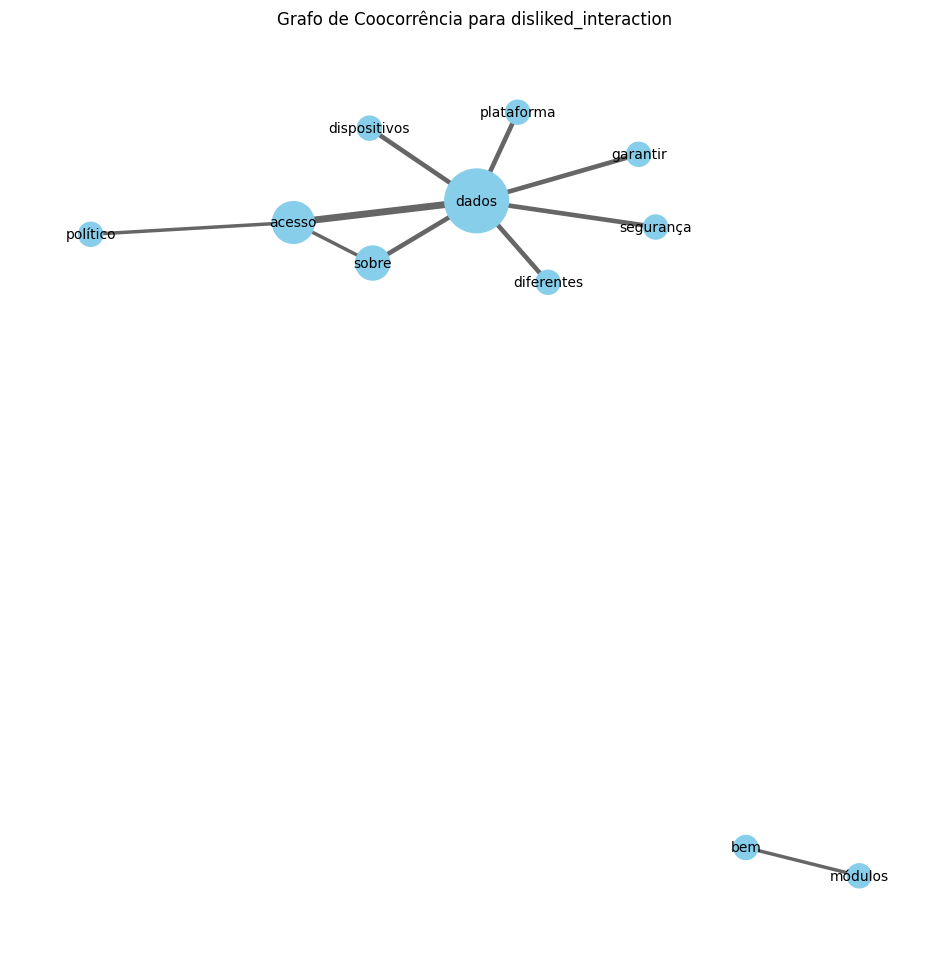

Top 10 coocorrências mais frequentes para Grafo de Coocorrência para expertise_level = ATUA NO MERCADO:
uc_manage_images - uc_manage_tasks: 49
uc_dashboard_user - uc_manage_images: 42
uc_dashboard_user - uc_manage_tasks: 42
imagem - uc_manage_images: 35
imagem - uc_manage_tasks: 35
imagem - uc_dashboard_user: 30
tarefa - uc_manage_images: 28
tarefa - uc_manage_tasks: 28
uc_manage_images - uc_my_profile: 28
uc_manage_images - usuario: 28


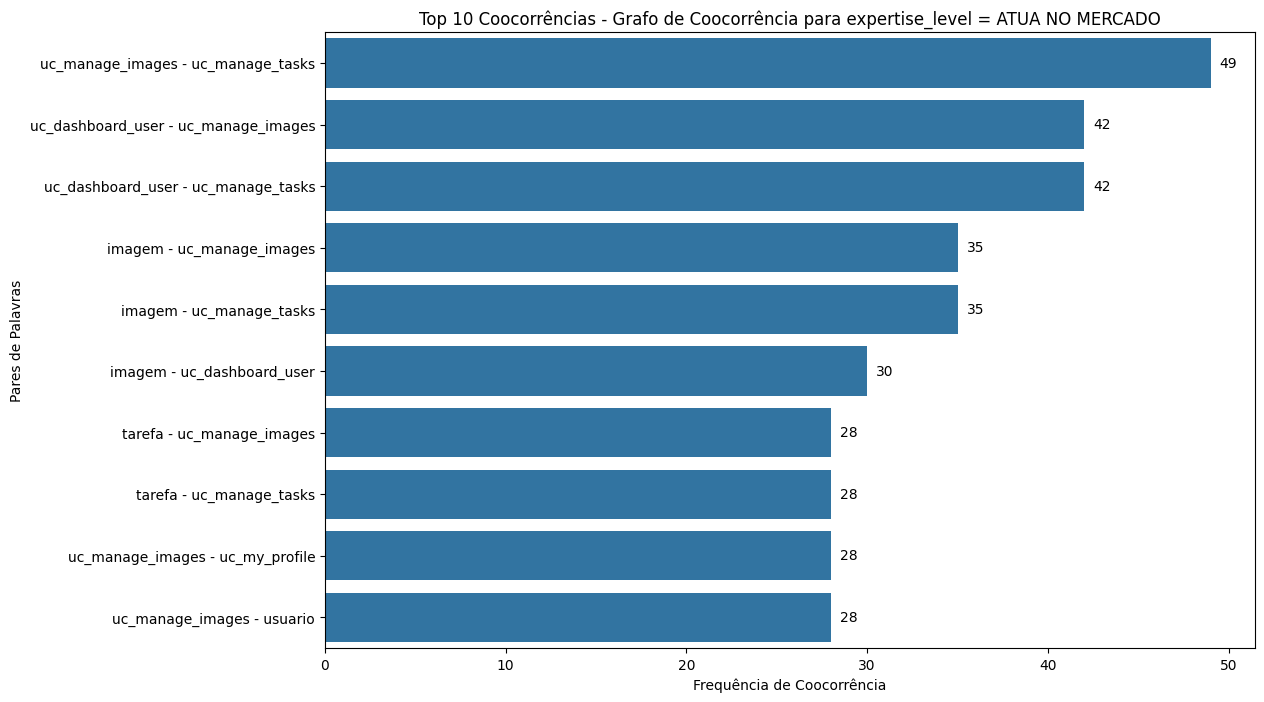

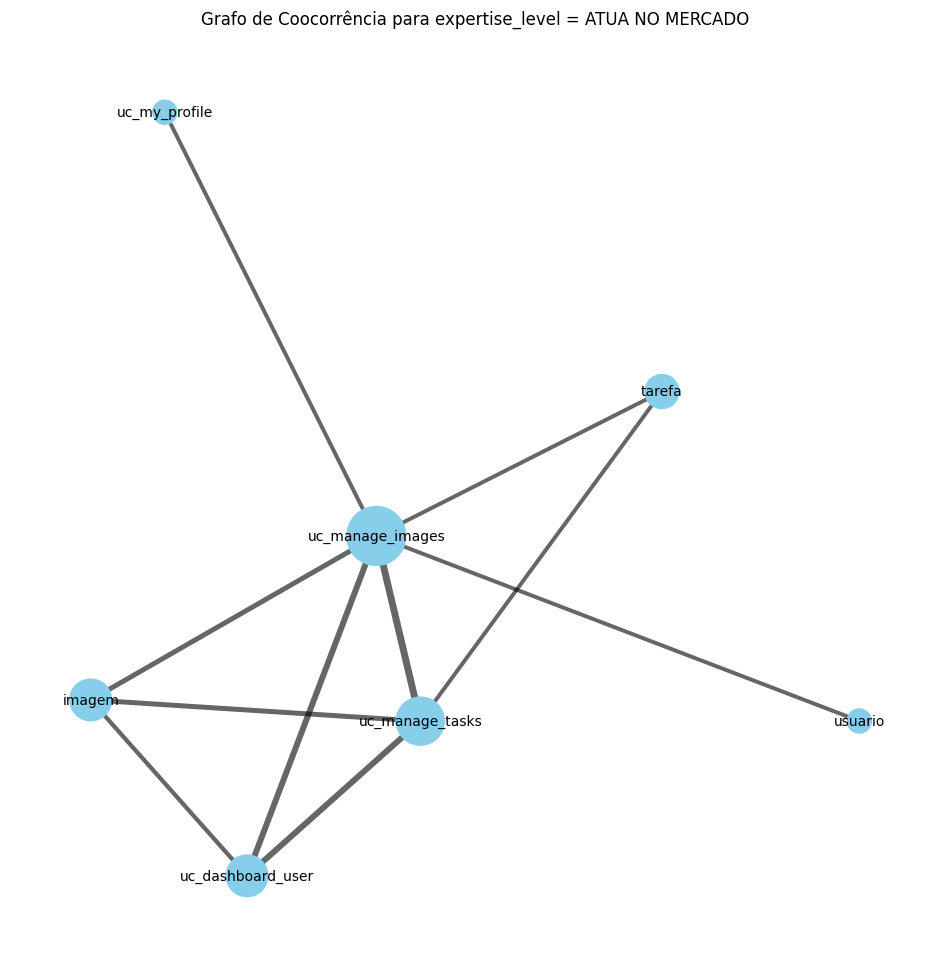

Top 10 coocorrências mais frequentes para Grafo de Coocorrência para expertise_level = APENAS ESTUDANTE:
acesso - dados: 12
dados - plataforma: 11
dados - sobre: 10
dados - diferentes: 8
dados - dispositivos: 8
dados - garantir: 8
dados - segurança: 8
plataforma - sobre: 8
dados - desempenho: 7
acesso - político: 6


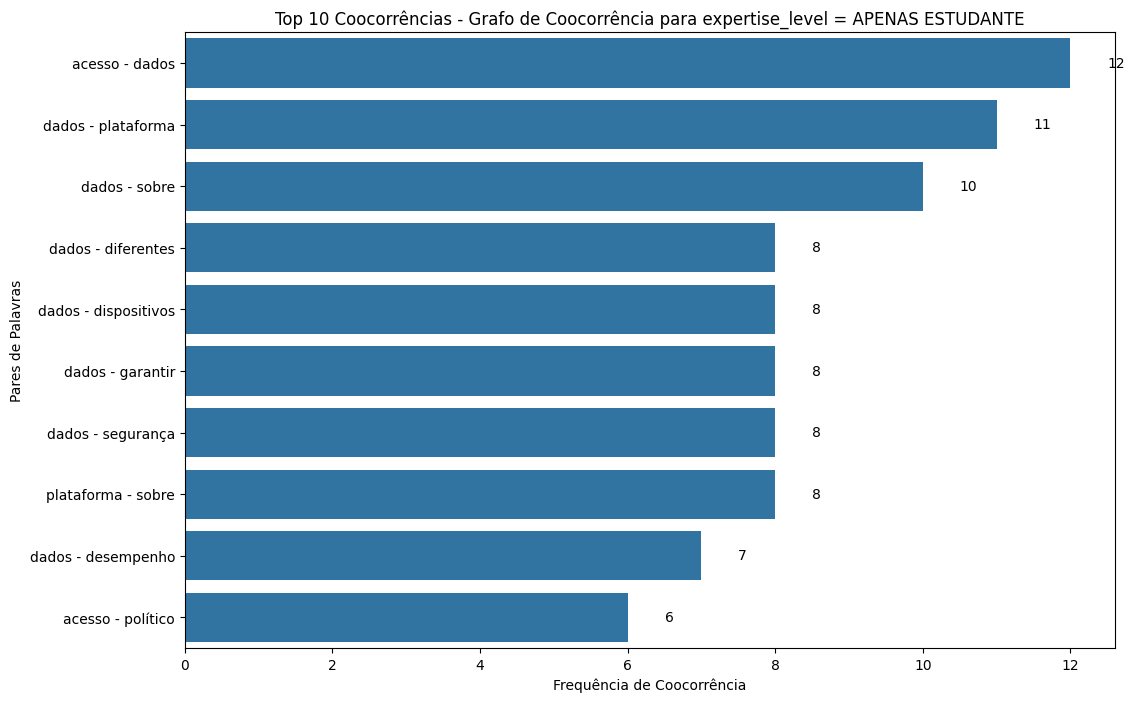

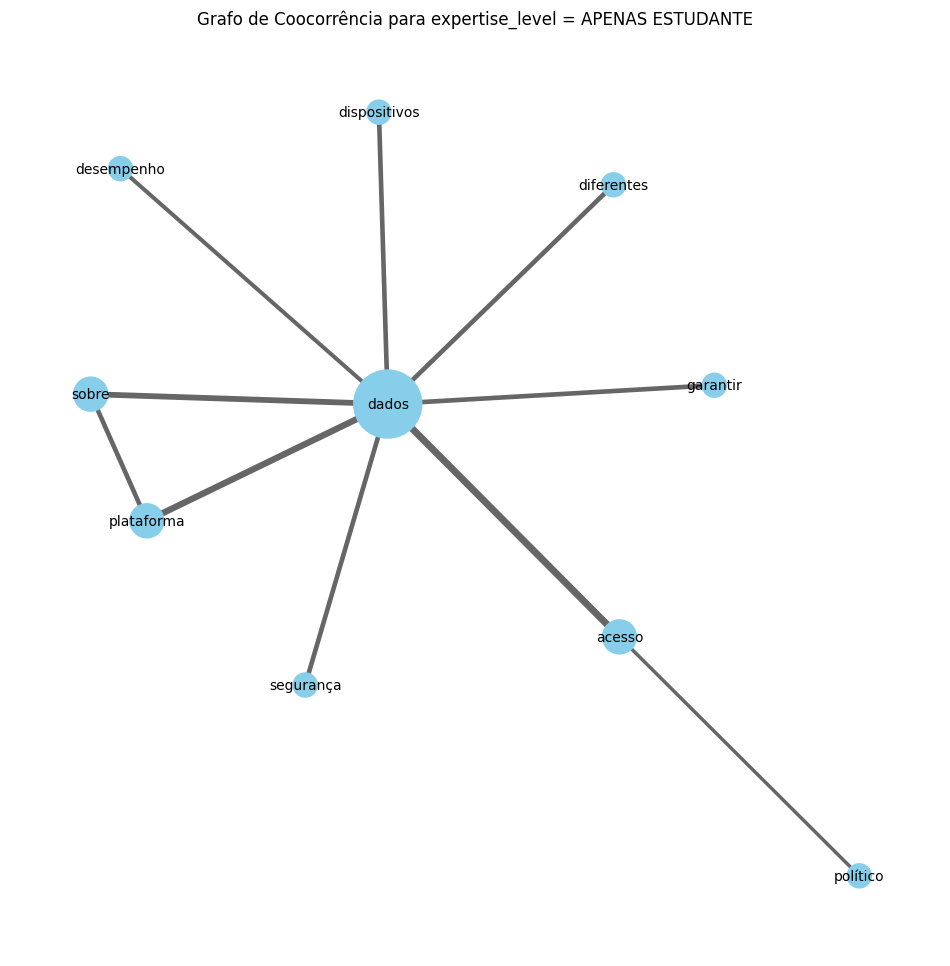

In [52]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
import nltk
import seaborn as sns

# Baixar stopwords em português
nltk.download('stopwords')

# Stopwords padrão
stop_words_pt = stopwords.words('portuguese')

# Função corrigida
def generate_cooccurrence_graph(df_filtered, title, filtrar_palavras=False, palavras_para_remover=[]):
    """
    Gera um grafo de coocorrência baseado no DataFrame filtrado e plota as 10 maiores coocorrências.
    """

    # Atualizar stopwords caso precise remover palavras adicionais
    stop_words_local = stop_words_pt
    if filtrar_palavras:
        stop_words_local = stop_words_local + palavras_para_remover

    # Vetorizar o texto
    vectorizer = CountVectorizer(stop_words=stop_words_local)
    X = vectorizer.fit_transform(df_filtered['prompt'])

    # Criar matriz de coocorrência
    Xc = (X.T * X)
    Xc.setdiag(0)

    # Converter para DataFrame
    df_cooc = pd.DataFrame(data=Xc.toarray(), columns=vectorizer.get_feature_names_out(), index=vectorizer.get_feature_names_out())

    # Filtrar palavras mais frequentes
    threshold = 20
    df_cooc_filtered = df_cooc[df_cooc.sum(axis=1) > threshold].loc[:, df_cooc.sum(axis=0) > threshold]

    if df_cooc_filtered.empty:
        print(f"Sem dados suficientes para criar grafo para {title}.")
        return

    # Criar grafo completo
    G_total = nx.from_pandas_adjacency(df_cooc_filtered)

    # Organizar coocorrências por peso
    sorted_edges = sorted(G_total.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    top_n = 10
    top_cooccurrences = sorted_edges[:top_n]

    # Criar grafo apenas com top coocorrências
    G = nx.Graph()
    for node1, node2, weight_data in top_cooccurrences:
        G.add_edge(node1, node2, weight=weight_data['weight'])

    # Exibir as coocorrências mais frequentes
    print(f"Top {top_n} coocorrências mais frequentes para {title}:")
    for edge in top_cooccurrences:
        print(f"{edge[0]} - {edge[1]}: {edge[2]['weight']}")

    # Criar DataFrame para gráfico de barras
    df_trigrams_expertise = pd.DataFrame(top_cooccurrences, columns=['Palavra 1', 'Palavra 2', 'Peso'])
    df_trigrams_expertise['Trigrama'] = df_trigrams_expertise.apply(lambda x: f"{x['Palavra 1']} - {x['Palavra 2']}", axis=1)
    df_trigrams_expertise['Frequência'] = df_trigrams_expertise['Peso'].apply(lambda x: x['weight'])

    # Plotar gráfico de barras
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='Frequência', y='Trigrama', data=df_trigrams_expertise)

    # Adicionar valores nas barras
    for index, value in enumerate(df_trigrams_expertise['Frequência']):
        ax.text(value + 0.5, index, str(int(value)), va='center')

    plt.xlabel("Frequência de Coocorrência")
    plt.ylabel("Pares de Palavras")
    plt.title(f"Top {top_n} Coocorrências - {title}")
    plt.show()

    # Plotar o grafo apenas com top coocorrências
    pos = nx.spring_layout(G, k=0.5, scale=0.1, seed=42)

    plt.figure(figsize=(12, 12))
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    weights = np.array(weights)
    weights = weights / weights.max() * 5

    node_sizes = [G.degree(node) * 300 for node in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    plt.title(title)
    plt.axis('off')
    plt.show()


    # Aplicar os filtros e gerar grafos de coocorrência
filters = {
    "liked_interaction": df['liked_interaction'] == True,
    "disliked_interaction": df['liked_interaction'] == False,
    "expertise_level": df['expertise_level']
}

for filter_name, filter_condition in filters.items():
    if filter_name == "expertise_level":
        for level in df['expertise_level'].unique():
            df_filtered = df[df['expertise_level'] == level]
            generate_cooccurrence_graph(df_filtered, f"Grafo de Coocorrência para expertise_level = {level}", filtrar_palavras=True, palavras_para_remover=palavras_para_remover)
    else:
        df_filtered = df[filter_condition]
        generate_cooccurrence_graph(df_filtered, f"Grafo de Coocorrência para {filter_name}", filtrar_palavras=True, palavras_para_remover=palavras_para_remover)


### MODELOS DE IA

#### 1 - CNN para Curtidas

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt
# import nltk
# from nltk.corpus import stopwords
# import re

# # Baixar stopwords em português (caso ainda não tenha)
# nltk.download('stopwords')

# # Lista de stopwords em português
# stop_words_pt = set(stopwords.words('portuguese'))

# # Função para limpar texto e remover stopwords
# def preprocess_text(text):
#     if isinstance(text, str):  # Garantir que o texto não seja NaN
#         text = text.lower()  # Converter para minúsculas
#         text = re.sub(r'[^\w\s]', '', text)  # Remover pontuação
#         text = ' '.join([word for word in text.split() if word not in stop_words_pt])  # Remover stopwords
#     return text

# # Supondo que df é o DataFrame que contém os dados
# # Carregar o arquivo CSV
# # file_path = "checkpoint.csv"  # Substituir pelo caminho correto do arquivo
# # df = pd.read_csv(file_path)

# # Aplicar a limpeza de texto
# df['combined_text'] = df['combined_text'].apply(preprocess_text)

# # Tokenização e Vetorização
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['combined_text'])
# X = tokenizer.texts_to_sequences(df['combined_text'])
# X = pad_sequences(X, padding='post')

# # Definir target binário (liked_interaction: True=1, False=0)
# y = df['liked_interaction'].astype(int)

# # Dividir os dados em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Definir a arquitetura da CNN para classificação binária
# model = Sequential([
#     Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]),
#     Conv1D(filters=128, kernel_size=5, activation='relu'),
#     GlobalMaxPooling1D(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # Camada de saída binária
# ])

# # Compilar o modelo
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Treinar o modelo
# history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)

# # Fazer previsões
# y_pred_probs = model.predict(X_test)
# y_pred = (y_pred_probs > 0.7).astype(int)  # Converter probabilidades para 0 ou 1

# # Avaliação do modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nAcurácia do modelo CNN: {accuracy:.4f}\n")

# print("\nClassification Report para CNN (binary liked_interaction):")
# print(classification_report(y_test, y_pred, target_names=['Não Liked', 'Liked']))

# # Matriz de confusão
# conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Liked', 'Liked'], yticklabels=['Não Liked', 'Liked'])
# plt.xlabel('Predito')
# plt.ylabel('Real')
# plt.title('Matriz de Confusão - CNN (liked_interaction)')
# plt.show()

In [ ]:
# from imblearn.over_sampling import SMOTE
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt
# import nltk
# from nltk.corpus import stopwords
# import re

# # Baixar stopwords em português (caso ainda não tenha)
# nltk.download('stopwords')

# # Lista de stopwords em português
# stop_words_pt = set(stopwords.words('portuguese'))

# # Função para limpar texto e remover stopwords
# def preprocess_text(text):
#     if isinstance(text, str):  # Garantir que o texto não seja NaN
#         text = text.lower()  # Converter para minúsculas
#         text = re.sub(r'[^\w\s]', '', text)  # Remover pontuação
#         text = ' '.join([word for word in text.split() if word not in stop_words_pt])  # Remover stopwords
#     return text

# # Supondo que df é o DataFrame que contém os dados
# # Carregar o arquivo CSV
# # file_path = "checkpoint.csv"  # Substituir pelo caminho correto do arquivo
# # df = pd.read_csv(file_path)

# # Aplicar a limpeza de texto
# df['combined_text'] = df['combined_text'].apply(preprocess_text)

# # Tokenização e Vetorização
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['combined_text'])
# X = tokenizer.texts_to_sequences(df['combined_text'])
# X = pad_sequences(X, padding='post')

# # Definir target binário (liked_interaction: True=1, False=0)
# y = df['liked_interaction'].astype(int)

# # Dividir os dados em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Inicializar o SMOTE
# smote = SMOTE(random_state=42)

# # Aplicar o SMOTE nos dados de treino
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Definir a arquitetura da CNN para classificação binária
# model = Sequential([
#     Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]),
#     Conv1D(filters=128, kernel_size=5, activation='relu'),
#     GlobalMaxPooling1D(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # Camada de saída binária
# ])

# # Compilar o modelo
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Treinar o modelo
# history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)

# # Fazer previsões
# y_pred_probs = model.predict(X_test)
# y_pred = (y_pred_probs > 0.7).astype(int)  # Converter probabilidades para 0 ou 1

# # Avaliação do modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nAcurácia do modelo CNN: {accuracy:.4f}\n")

# print("\nClassification Report para CNN (binary liked_interaction):")
# print(classification_report(y_test, y_pred, target_names=['Não Liked', 'Liked']))

# # Matriz de confusão
# conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Liked', 'Liked'], yticklabels=['Não Liked', 'Liked'])
# plt.xlabel('Predito')
# plt.ylabel('Real')
# plt.title('Matriz de Confusão - CNN (liked_interaction)')
# plt.show()

#### 2 - Naive Bayes para Curtidas

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt
# import nltk
# from nltk.corpus import stopwords

# # Baixar stopwords em português
# nltk.download('stopwords')


# df['combined_text'] = df['prompt'] + ' ' + df['response']

# # Stopwords padrão
# stop_words_pt = stopwords.words('portuguese')

# # Aplicar a conversão do target para binário (1 = liked, 0 = não liked)
# df['liked_interaction'] = df['liked_interaction'].astype(int)

# # Variáveis de texto para treinamento (prompt, response, combined_text)
# text_columns = ["prompt", "response", "combined_text"]

# for text_col in text_columns:
#     print(f"\nTreinando Naive Bayes com {text_col} como entrada...\n")

#     # Tratar valores NaN substituindo por string vazia
#     df[text_col] = df[text_col].fillna("").astype(str)

#     # Vetorização do texto com CountVectorizer (removendo stopwords)
#     vectorizer = CountVectorizer(stop_words=stop_words_pt)
#     X = vectorizer.fit_transform(df[text_col])

#     # Definir o target binário
#     y = df['liked_interaction']

#     # Dividir os dados em treino e teste
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#     # Criar e treinar o modelo Naive Bayes
#     model = MultinomialNB()
#     model.fit(X_train, y_train)

#     # Predição e avaliação do modelo
#     y_pred = model.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"\nAcurácia do modelo Naive Bayes: {accuracy:.4f}\n")

#     print(f"\nClassification Report para Naive Bayes com {text_col}:")
#     print(classification_report(y_test, y_pred, target_names=['Não Liked', 'Liked']))

#     # Matriz de confusão
#     conf_matrix = confusion_matrix(y_test, y_pred)

#     plt.figure(figsize=(6, 5))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Liked', 'Liked'], yticklabels=['Não Liked', 'Liked'])
#     plt.xlabel('Predito')
#     plt.ylabel('Real')
#     plt.title(f'Matriz de Confusão - Naive Bayes ({text_col})')
#     plt.show()

#     # Cross-validation
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     cross_val_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

#     print(f"\nCross-validation accuracy scores para {text_col}: {cross_val_results}")
#     print(f"Mean accuracy para {text_col}: {cross_val_results.mean():.4f}")


#### 3 - CNN para Nível de Expertise

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import nltk
# from nltk.corpus import stopwords
# import re

# # Baixar stopwords em português (caso ainda não tenha)
# nltk.download('stopwords')

# # Lista de stopwords em português
# stop_words_pt = set(stopwords.words('portuguese'))

# # Função para remover stopwords e caracteres especiais
# def preprocess_text(text):
#     if isinstance(text, str):  # Garantir que o texto não seja NaN
#         text = text.lower()  # Converter para minúsculas
#         text = re.sub(r'[^\w\s]', '', text)  # Remover pontuação
#         text = ' '.join([word for word in text.split() if word not in stop_words_pt])  # Remover stopwords
#     return text

# # Variáveis de texto para treinamento (prompt, response, combined_text)
# text_columns = ["prompt", "response", "combined_text"]

# for text_col in text_columns:
#     print(f"\nTreinando CNN com {text_col} como entrada (sem stopwords) para prever expertise_level...\n")

#     # Aplicar a remoção de stopwords
#     df[text_col] = df[text_col].apply(preprocess_text)

#     # Tokenização e Vetorização
#     tokenizer = Tokenizer()
#     tokenizer.fit_on_texts(df[text_col])
#     X = tokenizer.texts_to_sequences(df[text_col])
#     X = pad_sequences(X, padding='post')

#     # Codificar as classes `expertise_level`
#     label_encoder = LabelEncoder()
#     y = label_encoder.fit_transform(df['expertise_level'])

#     # Dividir os dados
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#     # Definir a arquitetura da CNN
#     model = Sequential([
#         Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]),
#         Conv1D(filters=128, kernel_size=5, activation='relu'),
#         GlobalMaxPooling1D(),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(len(label_encoder.classes_), activation='softmax')
#     ])

#     # Compilar o modelo
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Treinar o modelo
#     history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

#     # Avaliação do modelo
#     y_pred = np.argmax(model.predict(X_test), axis=1)
#     print(f"\nClassification Report para CNN com {text_col} (sem stopwords) - expertise_level:")
#     print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

#     # Matriz de confusão
#     conf_matrix = confusion_matrix(y_test, y_pred)

#     plt.figure(figsize=(6, 5))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Matriz de Confusão - CNN ({text_col}) (sem stopwords) - expertise_level')
#     plt.show()


#### 4 - Naive Bayes com Nível de Expertise

In [ ]:
# import pandas as pd
# import numpy as np
# import nltk
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
# import re

# # Baixar stopwords em português (caso ainda não tenha)
# nltk.download('stopwords')

# # Lista de stopwords em português
# stop_words_pt = set(stopwords.words('portuguese'))

# # Função para remover stopwords e caracteres especiais
# def preprocess_text(text):
#     if isinstance(text, str):  # Garantir que o texto não seja NaN
#         text = text.lower()  # Converter para minúsculas
#         text = re.sub(r'[^\w\s]', '', text)  # Remover pontuação
#         text = ' '.join([word for word in text.split() if word not in stop_words_pt])  # Remover stopwords
#     return text

# # Variáveis de texto para treinamento (prompt, response, combined_text)
# text_columns = ["prompt", "response", "combined_text"]

# for text_col in text_columns:
#     print(f"\nTreinando Naive Bayes com {text_col} como entrada (sem stopwords) para prever expertise_level...\n")

#     # Aplicar a remoção de stopwords
#     df[text_col] = df[text_col].apply(preprocess_text)

#     # Vetorização do texto com CountVectorizer
#     vectorizer = CountVectorizer()
#     X = vectorizer.fit_transform(df[text_col])

#     # Codificar as classes `expertise_level`
#     label_encoder = LabelEncoder()
#     y = label_encoder.fit_transform(df['expertise_level'])

#     # Dividir os dados
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#     # Criar e treinar o modelo Naive Bayes
#     model = MultinomialNB()
#     model.fit(X_train, y_train)

#     # Predição e avaliação do modelo
#     y_pred = model.predict(X_test)
#     print(f"\nClassification Report para Naive Bayes com {text_col} (sem stopwords) - expertise_level:")
#     print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

#     # Matriz de confusão
#     conf_matrix = confusion_matrix(y_test, y_pred)

#     plt.figure(figsize=(6, 5))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Matriz de Confusão - Naive Bayes ({text_col}) (sem stopwords) - expertise_level')
#     plt.show()

#     # Cross-validation
#     kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     cross_val_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

#     print(f"\nCross-validation accuracy scores para {text_col}: {cross_val_results}")
#     print(f"Mean accuracy para {text_col}: {cross_val_results.mean():.4f}")

### Tem algum padrão? Clusterizar com K-Means

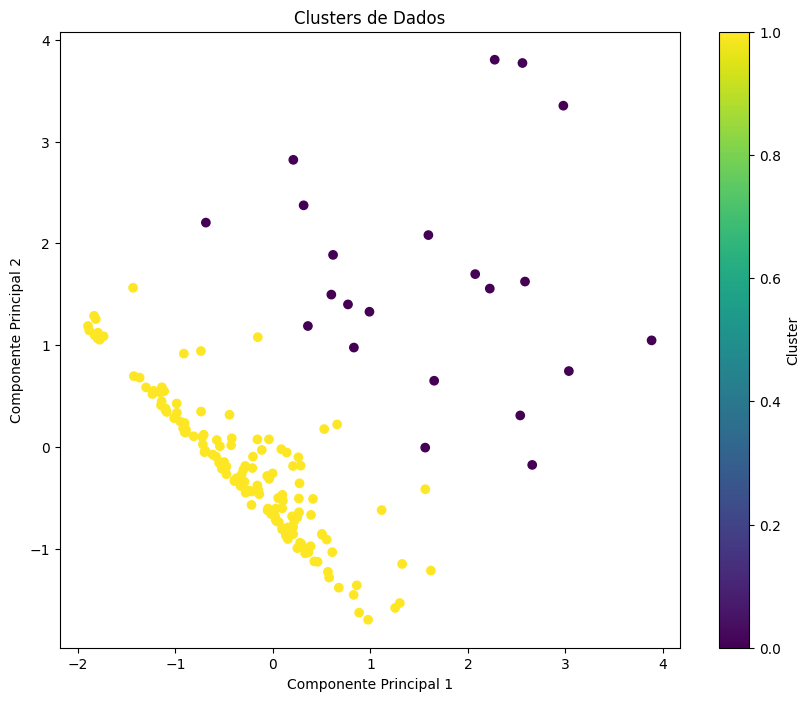

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar o arquivo CSV
file_path = "checkpoint.csv"  # Substituir pelo caminho correto do arquivo
df_original = pd.read_csv(file_path)

# Lista de colunas a serem removidas explicitamente
columns_to_remove = [
    'mais_positivo_experiencia_requisitos',
    'opiniao_padroes_prompts_requisitos',
    'relato_extra_requisitos',
    'maior_dificuldade_requisitos',
    'combined_text', 'class', 'cleaned_response',
    'relato_extra_requisitos', 'motivo_nao_uso_requisitos', 'cleaned_response_with_reference'
]

# Remover colunas que terminam com "_requisitos" e "_testes"
columns_to_remove += [col for col in df_original.columns if col.endswith("_requisitos") or col.endswith("_testes")]

# Remover colunas irrelevantes (IDs, textos longos)
columns_to_remove += ['Unnamed: 0', 'Matricula', 'conversation_id', 'prompt', 'response', 'codigo', 'theme']

# Remover as colunas especificadas do dataframe
df_cleaned = df_original.drop(columns=columns_to_remove, errors='ignore')

# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.select_dtypes(include=[float, int]))

# Reduzir a dimensionalidade para 2D para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)  # Ajuste o número de clusters conforme necessário
clusters = kmeans.fit_predict(df_pca)

# Plotar os clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Dados')
plt.colorbar(label='Cluster')
plt.show()

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Carregar o arquivo CSV
file_path = "checkpoint.csv"  # Substituir pelo caminho correto do arquivo
df_original = pd.read_csv(file_path)

# Lista de colunas a serem removidas explicitamente
columns_to_remove = [
    'mais_positivo_experiencia_requisitos',
    'opiniao_padroes_prompts_requisitos',
    'relato_extra_requisitos',
    'maior_dificuldade_requisitos',
    'combined_text', 'class', 'cleaned_response',
    'relato_extra_requisitos', 'motivo_nao_uso_requisitos', 'cleaned_response_with_reference'
]

# Remover colunas que terminam com "_requisitos" e "_testes"
columns_to_remove += [col for col in df_original.columns if col.endswith("_requisitos") or col.endswith("_testes")]

# Remover colunas irrelevantes (IDs, textos longos)
columns_to_remove += ['Unnamed: 0', 'Matricula', 'conversation_id', 'prompt', 'response', 'codigo', 'theme']

# Remover as colunas especificadas do dataframe
df_cleaned = df_original.drop(columns=columns_to_remove, errors='ignore')

# Converter booleanos para numérico (True -> 1, False -> 0)
df_cleaned['liked_interaction'] = df_cleaned['liked_interaction'].astype(int)
df_cleaned['disliked_interaction'] = df_cleaned['disliked_interaction'].astype(int)

# Identificar colunas categóricas para codificação numérica
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Aplicar Label Encoding às colunas categóricas
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le  # Guardar o encoder para referência futura

# Tratar valores ausentes preenchendo com a média
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

# Normalizar os dados para os modelos
X = df_cleaned.drop(columns=['liked_interaction', 'disliked_interaction', 'expertise_level'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tratar valores ausentes restantes após normalização
imputer = SimpleImputer(strategy="mean")
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Criar DataFrame tratado mantendo os nomes das colunas originais
column_names = X.columns
df_final = pd.DataFrame(X_scaled_imputed, columns=column_names)

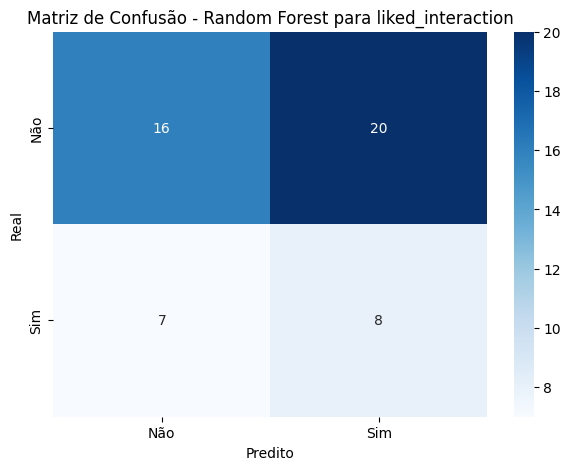

In [55]:
target = 'liked_interaction'

# Separar os dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled_imputed, df_cleaned[target], test_size=0.3, random_state=42)

# Treinar Random Forest
rf_liked = RandomForestClassifier(n_estimators=100, random_state=42)
rf_liked.fit(X_train, y_train)
y_pred_rf = rf_liked.predict(X_test)

# Avaliação
accuracy_rf_liked = accuracy_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Exibir a Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.title(f"Matriz de Confusão - Random Forest para {target}")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

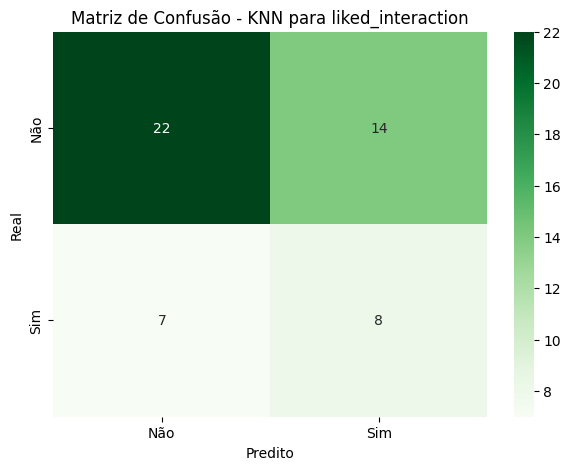

In [56]:
knn_liked = KNeighborsClassifier(n_neighbors=5)
knn_liked.fit(X_train, y_train)
y_pred_knn = knn_liked.predict(X_test)

# Avaliação
accuracy_knn_liked = accuracy_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Exibir a Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.title(f"Matriz de Confusão - KNN para {target}")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

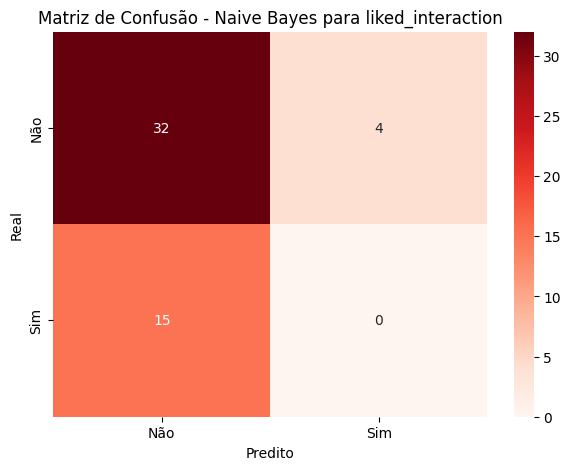

Acurácia do Naive Bayes para liked_interaction: 0.63


In [57]:
# Treinar Naive Bayes
nb_liked = GaussianNB()
nb_liked.fit(X_train, y_train)
y_pred_nb = nb_liked.predict(X_test)

# Avaliação
accuracy_nb_liked = accuracy_score(y_test, y_pred_nb)
cm = confusion_matrix(y_test, y_pred_nb)

# Exibir a Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.title(f"Matriz de Confusão - Naive Bayes para {target}")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

print(f"Acurácia do Naive Bayes para {target}: {accuracy_nb_liked:.2f}")

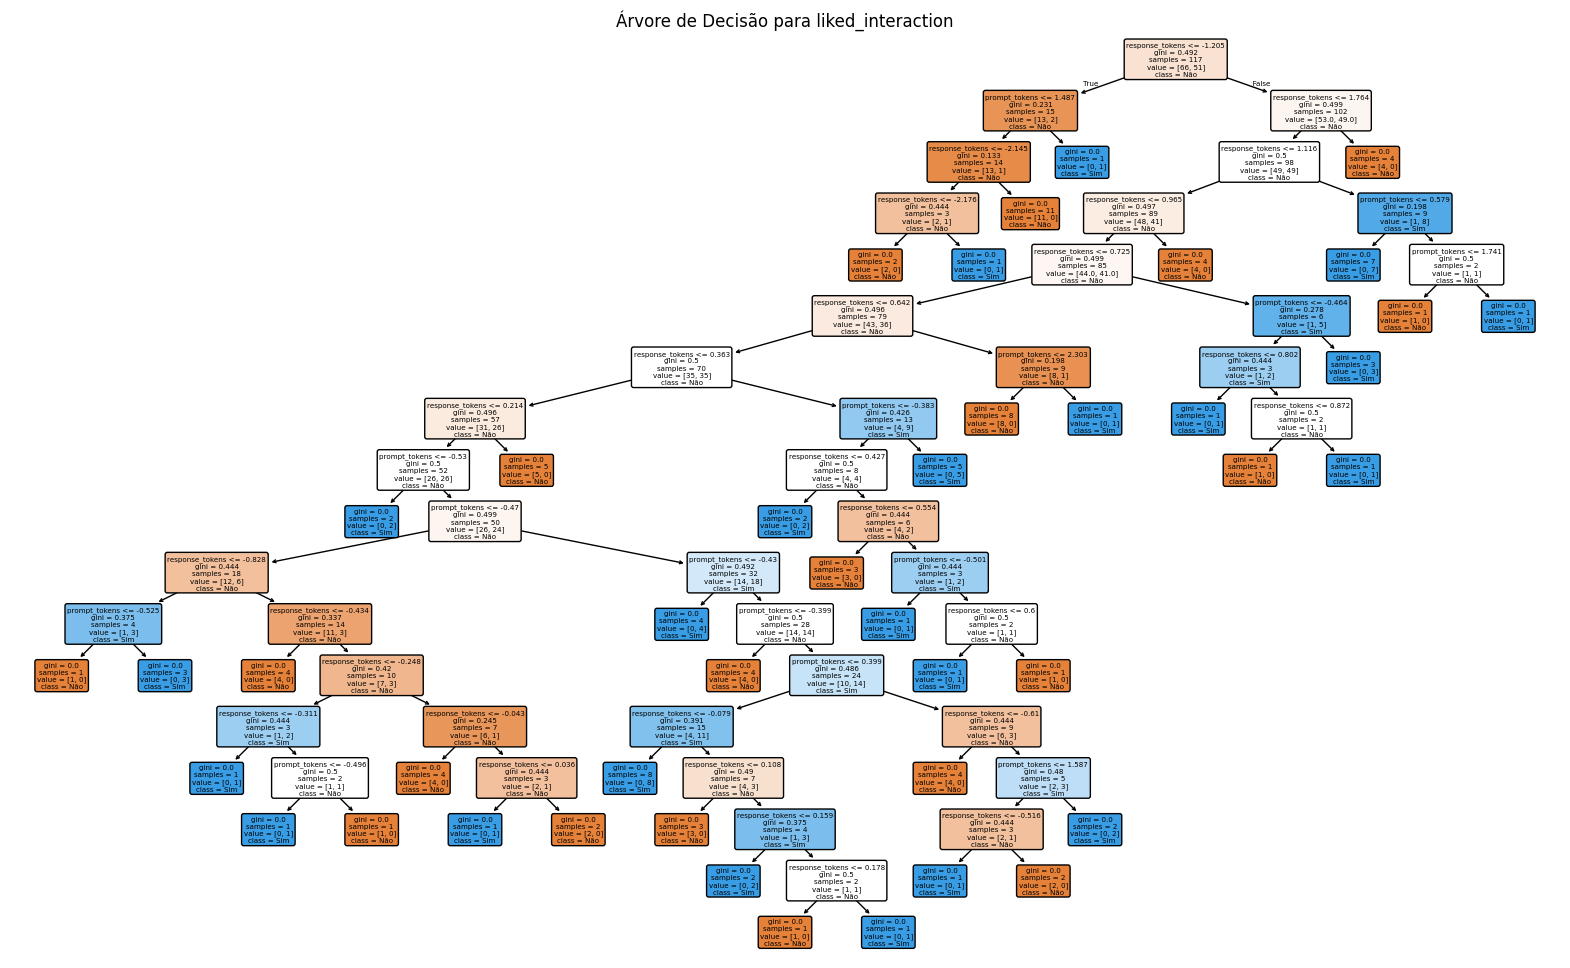

In [58]:
tree_liked = DecisionTreeClassifier(random_state=42)
tree_liked.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(tree_liked, feature_names=column_names, class_names=['Não', 'Sim'], filled=True, rounded=True)
plt.title("Árvore de Decisão para liked_interaction")
plt.show()

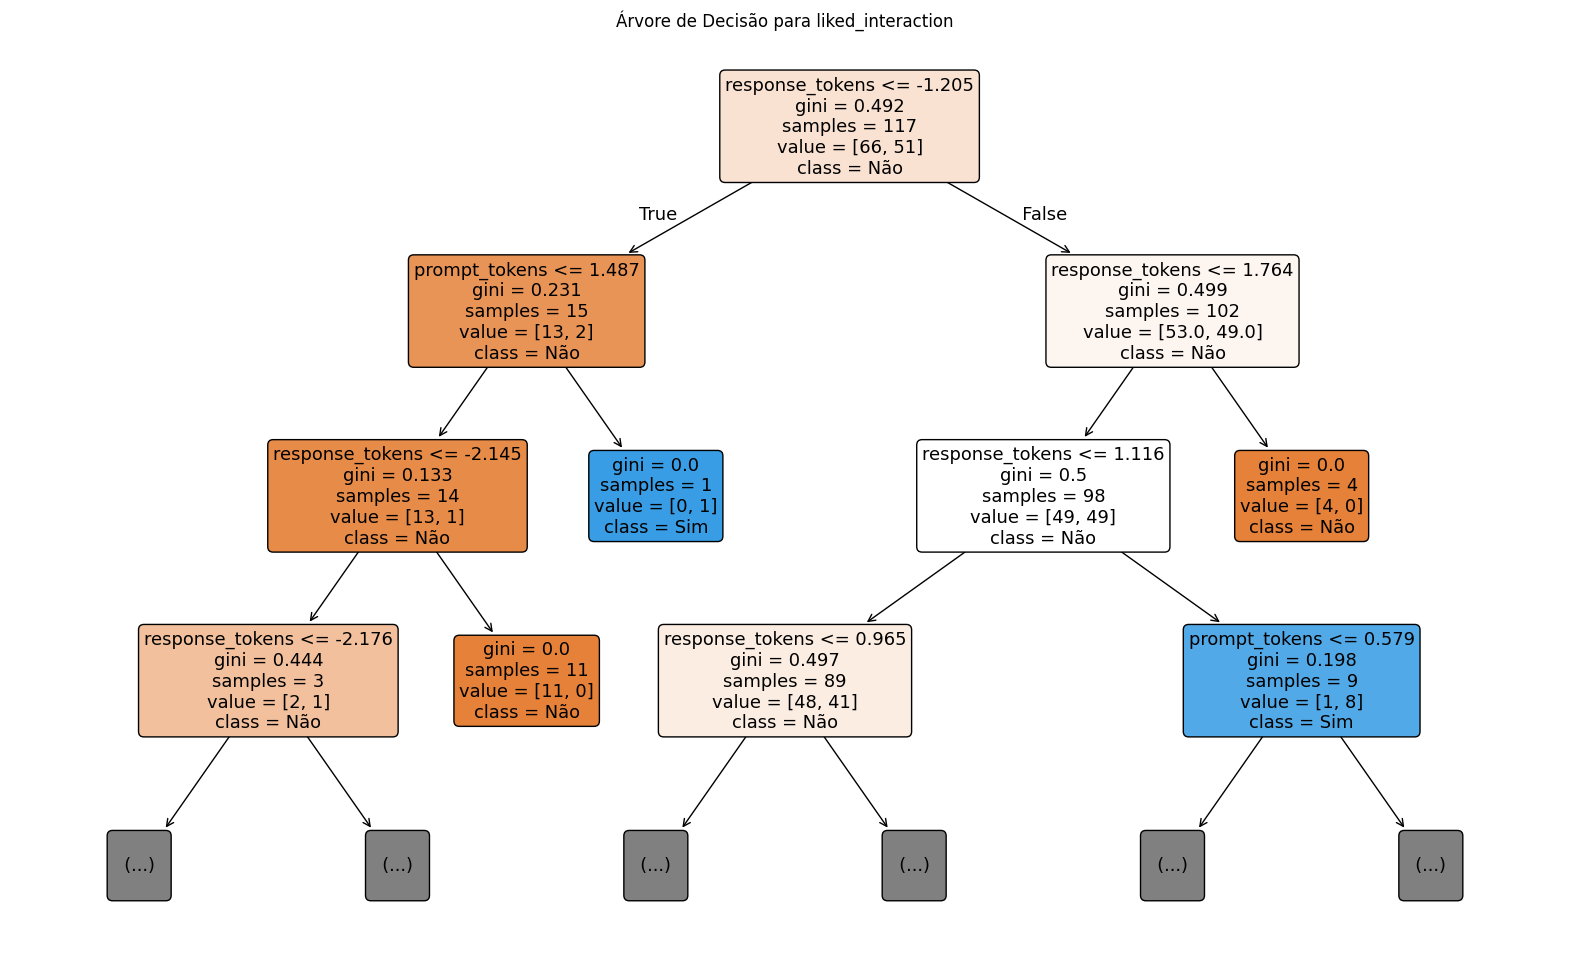

In [59]:
tree_liked = DecisionTreeClassifier(random_state=42)
tree_liked.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(tree_liked, feature_names=column_names, class_names=['Não', 'Sim'], filled=True, rounded=True, max_depth=3)
plt.title(f"Árvore de Decisão para {target}")
plt.show()

In [ ]:
# # # Carregar o arquivo CSV
# # file_path = "checkpoint.csv"  # Substituir pelo caminho correto do arquivo
# # df_cleaned = pd.read_csv(file_path)

# # Filtrar os registros onde 'liked_interaction' é False
# df_filtered = df_cleaned[df_cleaned['liked_interaction'] == False]

# X_scaled_imputed_filtered = X_scaled_imputed[df_cleaned['liked_interaction'] == False]

# # Separar os dados
# X_train, X_test, y_train, y_test = train_test_split(X_scaled_imputed_filtered, df_filtered[target], test_size=0.3, random_state=42)

# # Treinar Random Forest
# rf_disliked = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_disliked.fit(X_train, y_train)
# y_pred_rf = rf_disliked.predict(X_test)

# # Avaliação
# accuracy_rf_disliked = accuracy_score(y_test, y_pred_rf)
# cm = confusion_matrix(y_test, y_pred_rf)

# # Exibir a Matriz de Confusão
# plt.figure(figsize=(7, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
# plt.title(f"Matriz de Confusão - Random Forest para {target}")
# plt.xlabel("Predito")
# plt.ylabel("Real")
# plt.show()

In [ ]:
# knn_disliked = KNeighborsClassifier(n_neighbors=5)
# knn_disliked.fit(X_train, y_train)
# y_pred_knn = knn_disliked.predict(X_test)

# # Avaliação
# accuracy_knn_disliked= accuracy_score(y_test, y_pred_knn)
# cm = confusion_matrix(y_test, y_pred_knn)

# # Exibir a Matriz de Confusão
# plt.figure(figsize=(7, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
# plt.title(f"Matriz de Confusão - KNN para {target}")
# plt.xlabel("Predito")
# plt.ylabel("Real")
# plt.show()

In [ ]:
# # Treinar Naive Bayes
# nb_disliked = GaussianNB()
# nb_disliked.fit(X_train, y_train)
# y_pred_nb = nb_disliked.predict(X_test)

# # Avaliação
# accuracy_nb_disliked = accuracy_score(y_test, y_pred_nb)
# cm = confusion_matrix(y_test, y_pred_nb)

# # Exibir a Matriz de Confusão
# plt.figure(figsize=(7, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
# plt.title(f"Matriz de Confusão - Naive Bayes para {target}")
# plt.xlabel("Predito")
# plt.ylabel("Real")
# plt.show()

# print(f"Acurácia do Naive Bayes para {target}: {accuracy_nb_disliked:.2f}")


In [ ]:
# tree_disliked = DecisionTreeClassifier(random_state=42)
# tree_disliked.fit(X_train, y_train)

# plt.figure(figsize=(20, 12))
# plot_tree(tree_disliked, feature_names=column_names, class_names=['Não', 'Sim'], filled=True, rounded=True)
# plt.title(f"Árvore de Decisão para {target}")
# plt.show()

In [ ]:
# tree_disliked = DecisionTreeClassifier(random_state=42)
# tree_disliked.fit(X_train, y_train)

# plt.figure(figsize=(20, 12))
# plot_tree(tree_disliked, feature_names=column_names, class_names=['Não', 'Sim'], filled=True, rounded=True, max_depth=3)
# plt.title(f"Árvore de Decisão para {target}")
# plt.show()

In [ ]:
# target = 'expertise_level'

# # Separar os dados
# X_train, X_test, y_train, y_test = train_test_split(X_scaled_imputed, df_cleaned[target], test_size=0.3, random_state=42)

# # Treinar Random Forest
# rf_expertise = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_expertise.fit(X_train, y_train)
# y_pred_rf = rf_expertise.predict(X_test)

# # Avaliação
# accuracy_rf_expertise = accuracy_score(y_test, y_pred_rf)
# cm = confusion_matrix(y_test, y_pred_rf)

# # Exibir a Matriz de Confusão
# plt.figure(figsize=(7, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Apenas Estudante', 'Estagiário'], yticklabels=['Apenas Estudante', 'Estagiário'])
# plt.title(f"Matriz de Confusão - Random Forest para {target}")
# plt.xlabel("Predito")
# plt.ylabel("Real")
# plt.show()

In [ ]:
# knn_expertise = KNeighborsClassifier(n_neighbors=5)
# knn_expertise.fit(X_train, y_train)
# y_pred_knn = knn_expertise.predict(X_test)

# # Avaliação
# accuracy_knn_expertise = accuracy_score(y_test, y_pred_knn)
# cm = confusion_matrix(y_test, y_pred_knn)

# # Exibir a Matriz de Confusão
# plt.figure(figsize=(7, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Apenas Estudante', 'Estagiário'], yticklabels=['Apenas Estudante', 'Estagiário'])
# plt.title(f"Matriz de Confusão - KNN para {target}")
# plt.xlabel("Predito")
# plt.ylabel("Real")
# plt.show()

In [ ]:
# # Treinar Naive Bayes
# nb_expertise = GaussianNB()
# nb_expertise.fit(X_train, y_train)
# y_pred_nb = nb_expertise.predict(X_test)

# # Avaliação
# accuracy_nb_expertise = accuracy_score(y_test, y_pred_nb)
# cm = confusion_matrix(y_test, y_pred_nb)

# # Exibir a Matriz de Confusão
# plt.figure(figsize=(7, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Apenas Estudante', 'Estagiário'], yticklabels=['Apenas Estudante', 'Estagiário'])
# plt.title(f"Matriz de Confusão - Naive Bayes para {target}")
# plt.xlabel("Predito")
# plt.ylabel("Real")
# plt.show()

# print(f"Acurácia do Naive Bayes para {target}: {accuracy_nb_expertise:.2f}")


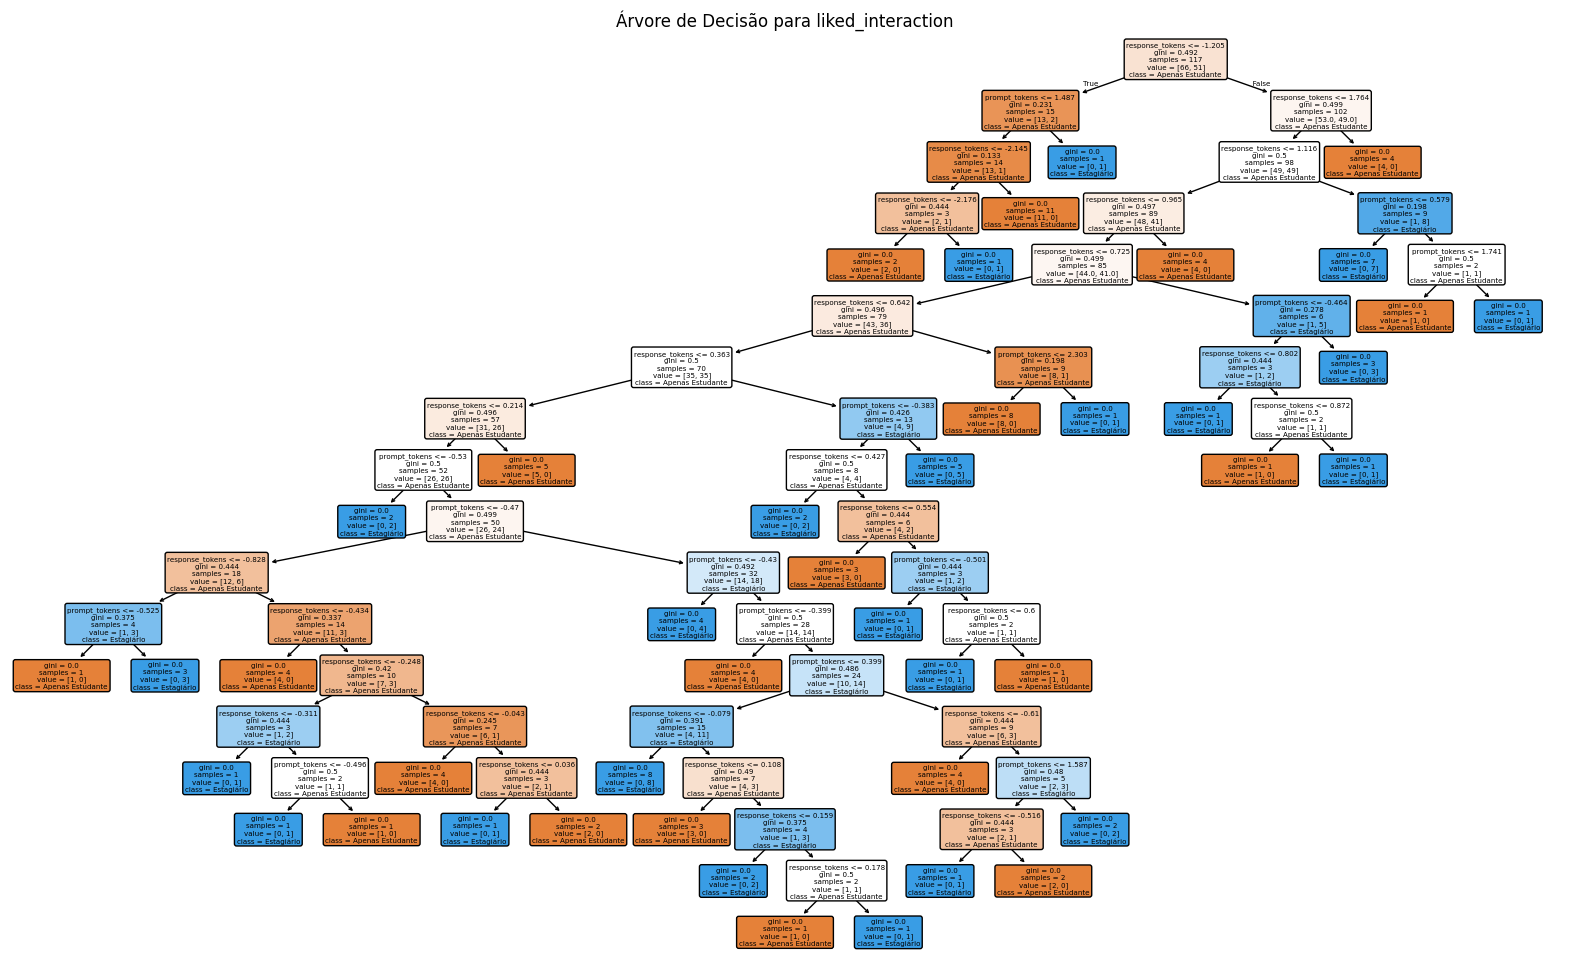

In [60]:
tree_expertise = DecisionTreeClassifier(random_state=42)
tree_expertise.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(tree_expertise, feature_names=column_names, class_names=['Apenas Estudante', 'Estagiário'], filled=True, rounded=True)
plt.title(f"Árvore de Decisão para {target}")
plt.show()

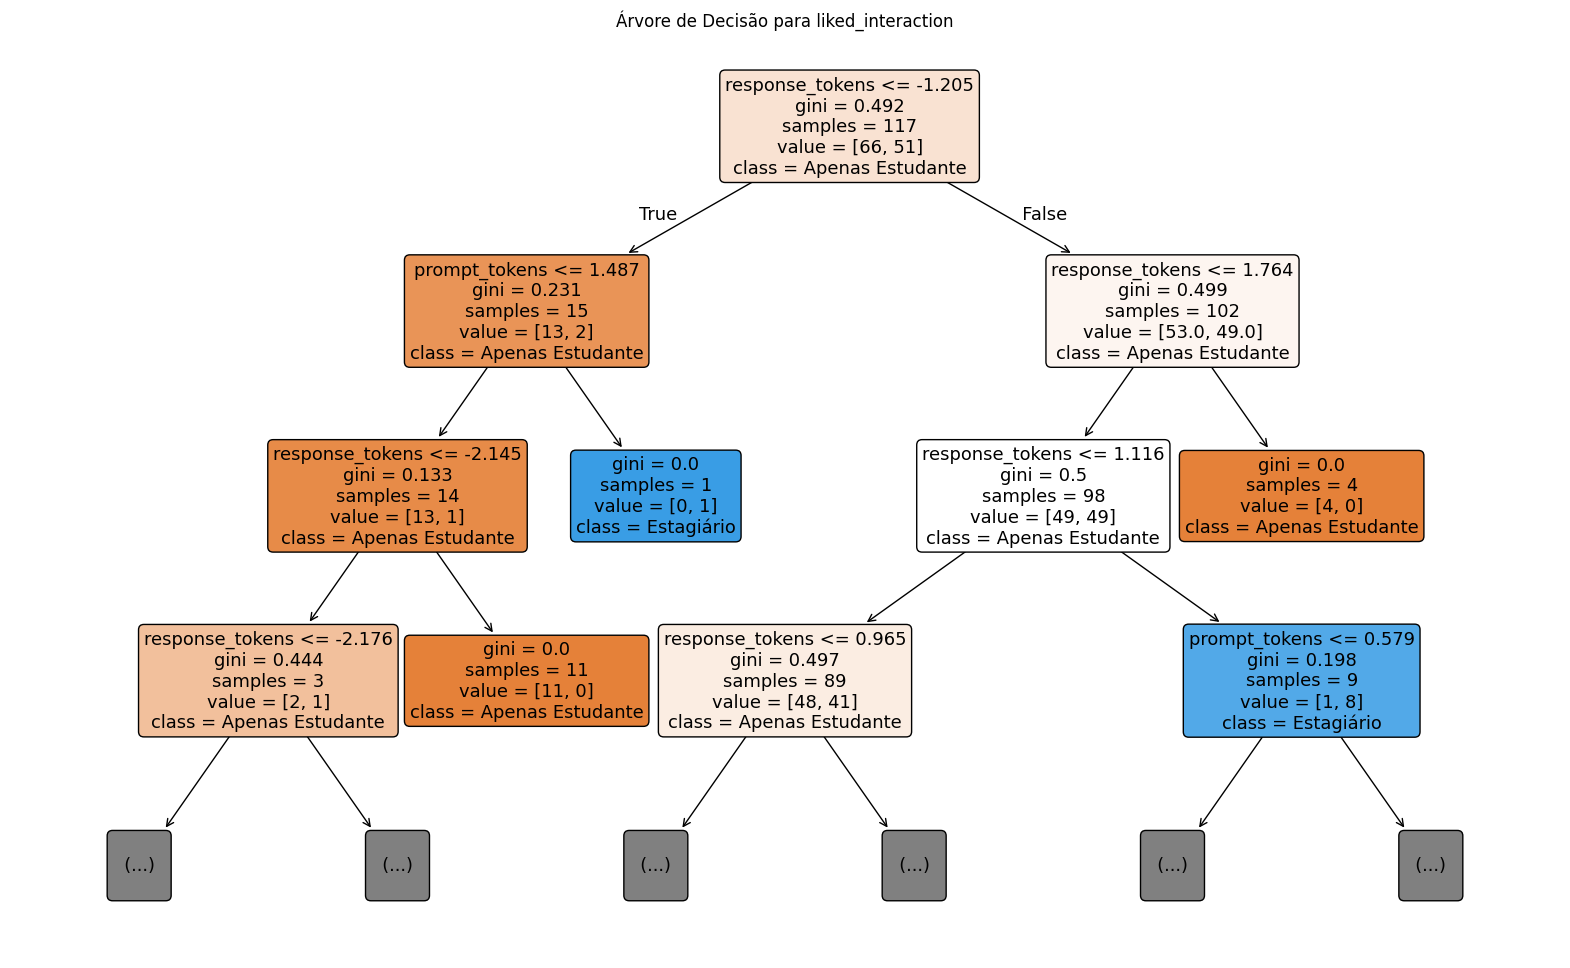

In [61]:
plt.figure(figsize=(20, 12))
plot_tree(tree_expertise, feature_names=column_names, class_names=['Apenas Estudante', 'Estagiário'], filled=True, rounded=True, max_depth=3)
plt.title(f"Árvore de Decisão para {target}")
plt.show()